In [1]:
!gdown 18oAk7YvwmgKDRdfavU1DKwLlcWhbktbk

Downloading...
From: https://drive.google.com/uc?id=18oAk7YvwmgKDRdfavU1DKwLlcWhbktbk
To: /content/Travel.csv
100% 468k/468k [00:00<00:00, 35.7MB/s]


# Rakamin Final Project - Kelompok 8 (Infinity)

### Anggota Kelompok:
- Andre Adeputra S
- Gilang Muhammad Risky
- Jomas Sekar Pawestri
- M Nurkholis Fauzi
- Muhammad Syarif U
- Naomi Florenata Damanik
- Sakinah Nurul R
- Vanesa

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.set_option('display.precision', 2)

In [3]:
rcParams['figure.figsize'] = 12, 8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Dataset diambil dari Kaggle, [Holiday Package Prediction](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction)

In [4]:
# Colab path
filepath = '/content/Travel.csv'

In [5]:
# Load Data
df = pd.read_csv(filepath)
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# 1. Exploratory Data Analysis

## 1.1 Descriptive Analysis

In [6]:
df.shape

(4888, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Data terdiri dari 4888 baris dan 20 kolom yang terbagi menjadi 14 kolom numerik dan 6 kolom kategori bedasarkan jenis data. Berdasarkan pengamatan lebih lanjut kolom ProdTaken, CityTier, PreferredPropertyStar, Passport, dan OwnCar merupakan kolom kategori.

In [8]:
# Separate columns based on data type
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [9]:
df[cats] = df[cats].astype('object')

In [10]:
# Check for missing values
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

Missing values ada di 8 kolom: Age, TypeOfContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome

In [11]:
# Check for duplicated rows ignoring CustomerID column
dupes = df.drop('CustomerID', axis=1).duplicated()
print(f'Total Duplicate Rows: {dupes.sum()}')

Total Duplicate Rows: 141


Terdapat 141 baris data yang apabila kolom CustomerID diabaikan menunjukkan nilai kolom yang identik

In [12]:
# Descriptive statistics for numerical columns
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.50,1411.19,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.62,9.32,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.49,8.52,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.91,0.72,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.71,1.00,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.24,1.85,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4822.0,1.19,0.86,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.85,5380.70,1000.0,20346.00,22347.0,25571.00,98678.0


Rentang nilai max dan min DurationOfPitch dan NumberOfTrips cukup jauh

MonthlyIncome memiliki nilai std yang cukup tinggi, menunjukkan ada kecenderungan pendapatan memengaruhi pemilihan produk

In [13]:
# Descriptive statistics for categorical columns
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
CityTier,4888,3,1,3190
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
PitchSatisfactionScore,4888,5,3,1478
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842


In [14]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print()

ProdTaken: [1 0]

CityTier: [3 1 2]

PreferredPropertyStar: [3.0 4.0 5.0 nan]

Passport: [1 0]

OwnCar: [1 0]

PitchSatisfactionScore: [2 3 5 4 1]

TypeofContact: ['Self Enquiry' 'Company Invited' nan]

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender: ['Female' 'Male' 'Fe Male']

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



Kolom CityTier menunjukkan klasifikasi kota produk yang sesuai.

PreferredPropertyStar menunjukkan kecenderungan kategori star 3-5 dan mungkin dapat digunakan sebagai kriteria penentuan produk package yang baru.

Nilai pada kolom PitchSatisfactionScore beragam dan dapat diambil sebagai masukan untuk perbaikan produk.


Pada kategori gender terdapat 3 nilai unik yang pada umumnya hanya ada 2. Berdasar pengamatan di atas, nilai 'Fe Male' diduga merupakan kesalahan memasukkan data sehingga akan langsung dilakukan pengubahan

In [15]:
# The contents of the Gender column contain an error in writing “Fe Male” which should be “Female”.
df.replace('Fe Male','Female', inplace = True)

CityTier dapat menunjukkan klasifikasi kota target produk yang sesuai

PreferredPropertyStar menunjukkan kecenderungan kategori star 3-5 dan mungkin dapat digunakan sebagai kriteria penentuan produk package yang baru

ProdTaken memiliki mean yang cukup rendah menandakan kebanyakan produk yang tidak dipilih dapat menjadi evaluasi produk baru

PitchSatisfactionScore beragam dan dapat menjadi masukan untuk perbaikan produk


Berdasarkan insight-insight yang diperoleh di atas, beberapa tindak lanjut yang perlu dilakukan antara lain:
* Klasifikasi data mana yang numerical dan categorical (fitur prodtaken, citytier, etc merupakan categorical masih dalam numerical)
* Handling missing value
* Cek klasifikasi di fitur gender
* Persentase klasifikasi


## 1.2 Univariate Analysis

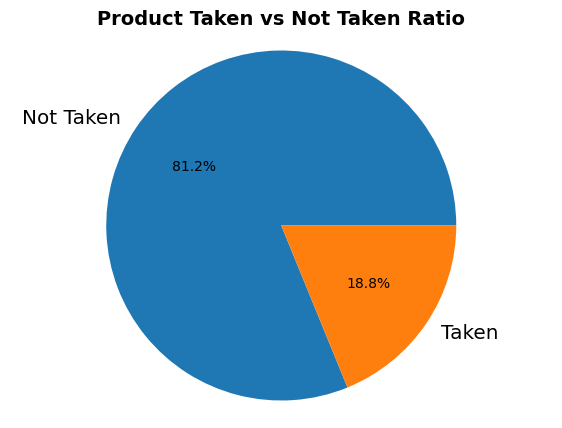

In [16]:
# Check for customers' purchase ratio
plt.figure(figsize=(7,5))
plt.pie(df['ProdTaken'].value_counts(), labels=['Not Taken', 'Taken'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Product Taken vs Not Taken Ratio', fontsize=14, fontweight='bold')
plt.show()

Berdasarkan grafik di atas, dapat diamati bahwa 18.8% dari total pelanggan memutuskan untuk tidak membeli produk perusahaan. Nilai tersebut merupakan nilai dari kolom target ProdTaken yang akan digunakan sebagai target kolom yang mewakili metrik conversion rate. Dapat diamati dari diagram di atas, bahwa nilai antara customer yang membeli dan yang tidak cukup timpang. Pada tahap selanjutnya, kemungkinan akan diperlukan penanganan terhadap data yang timpang.

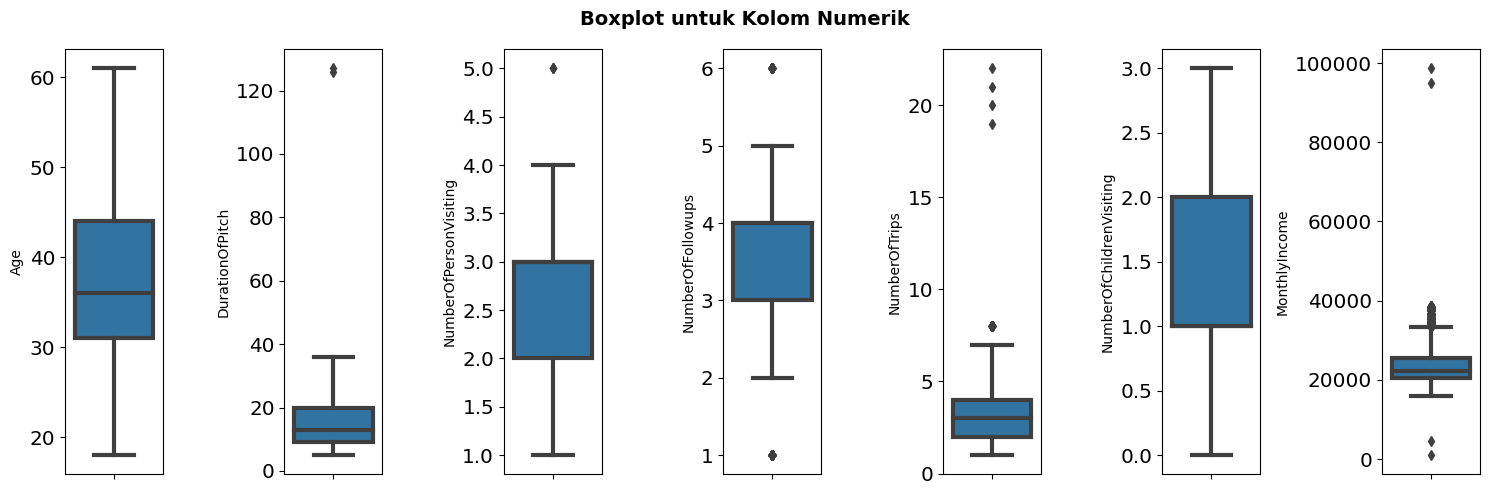

In [17]:
plt.figure(figsize=(15,5))
plt.suptitle('Boxplot untuk Kolom Numerik', fontsize=14, fontweight='bold')
for i in range(1, len(nums)):
    plt.subplot(1, 7, i)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.show()

DurationOfPitch secara umum (IQR) tersebar dari 9-20 menit, namun terdapat outlier maximal dengan durasi selama 127 menit

kisaran NumerOfTrips yang diambil adalah 2-4 trips, namun terdapat banyak outlier dengan maksimal jumlah trips sebanyak 22

MonthlyIncome secara umum berkisar 20-25 ribu rupe(?), memiliki data outlier dengan income terendah 1000 rupee dan tertinggi sekitar 98678 rupe


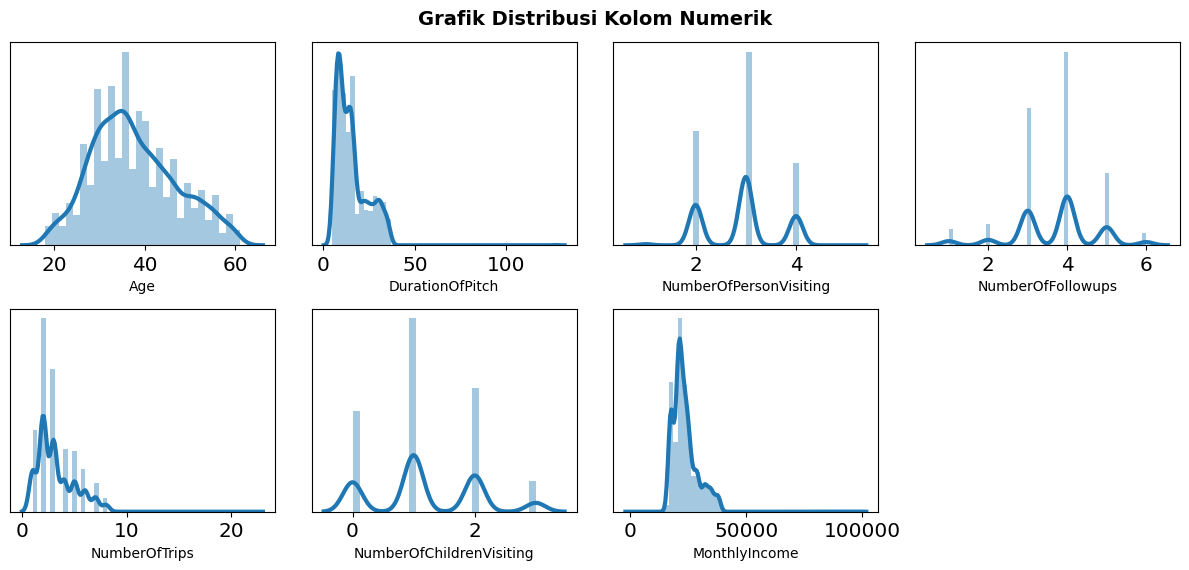

In [18]:
plt.suptitle('Grafik Distribusi Kolom Numerik', fontsize=14, fontweight='bold')
for i in range(1, len(nums)):
    plt.subplot(3, 4, i)
    sns.distplot(df[nums[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

Fitur Age memiliki sebaran data yang cukup normal

kolom DurationOfPitch, NumberOfTrips dan MonthlyIncome memiliki sebaran data positif skew (right tail)


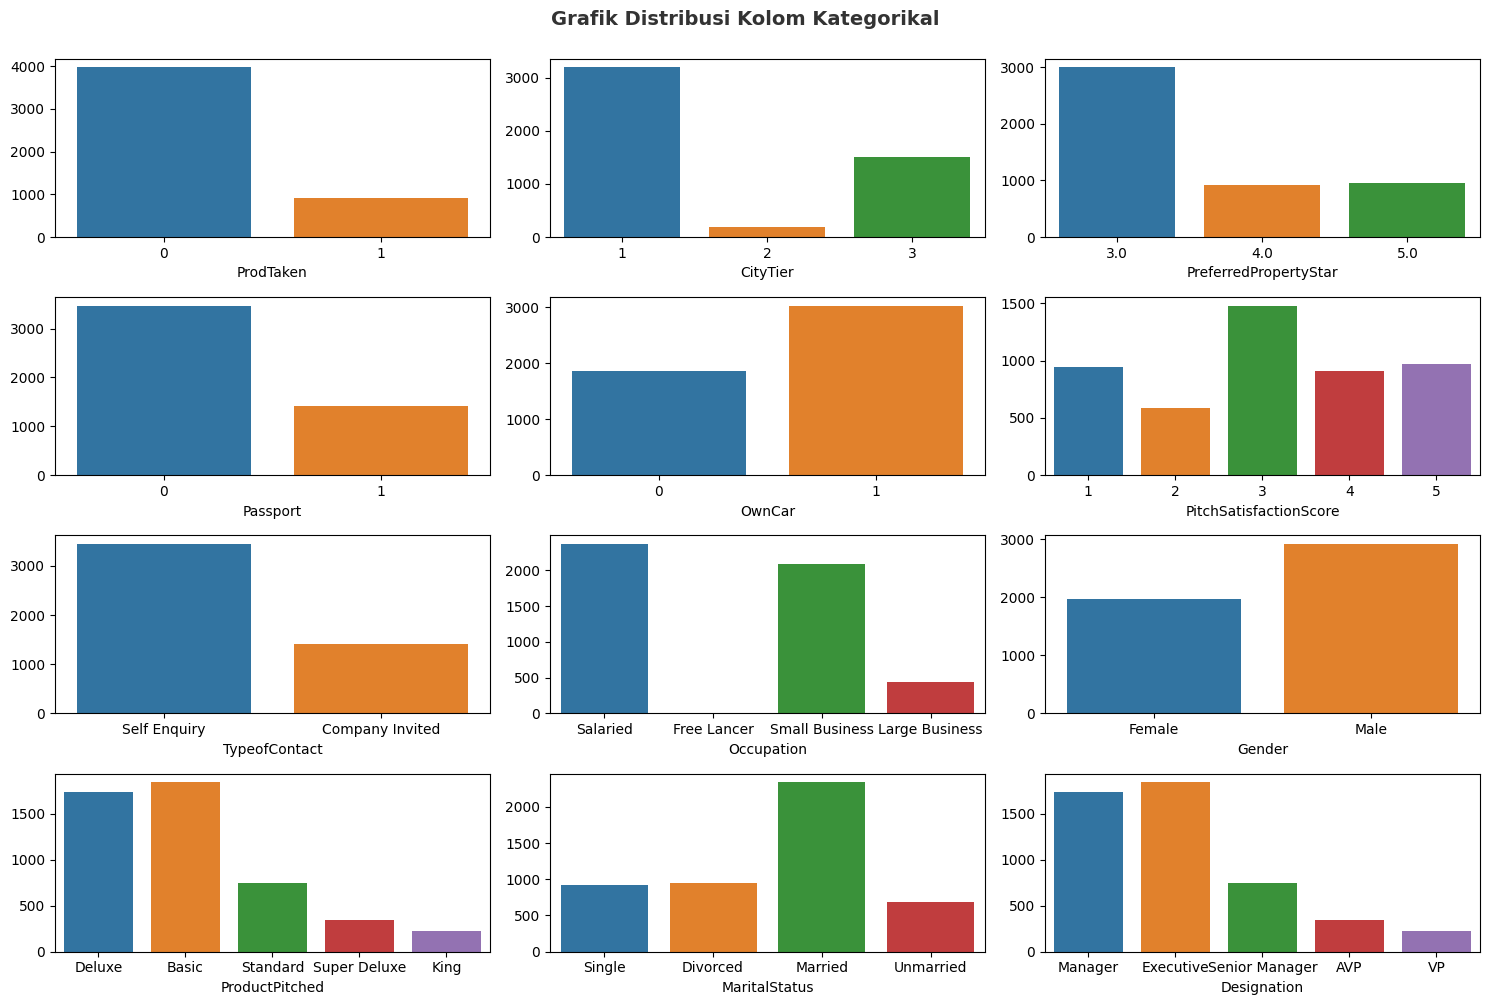

In [19]:
plt.figure(figsize=(15,10))
plt.suptitle('Grafik Distribusi Kolom Kategorikal', fontsize=14, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cats):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col])
    plt.ylabel('')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

TypeofContact didominasi oleh Self Enquiry

FItur Occupation didominasi Salaried

Fitur Gender didominasi pelanggan laki-laki

Fitur ProductPitched didominasi Basic

Fitur MaritalStatus didominasi Married

Fitur Designation didominasi Executive

Redundant dalam kategori gender female dan fe-male

Redundant kategori Single dan Unmarried dalam fitur MaritalStatus


## 1.3 Multivariate Analysis

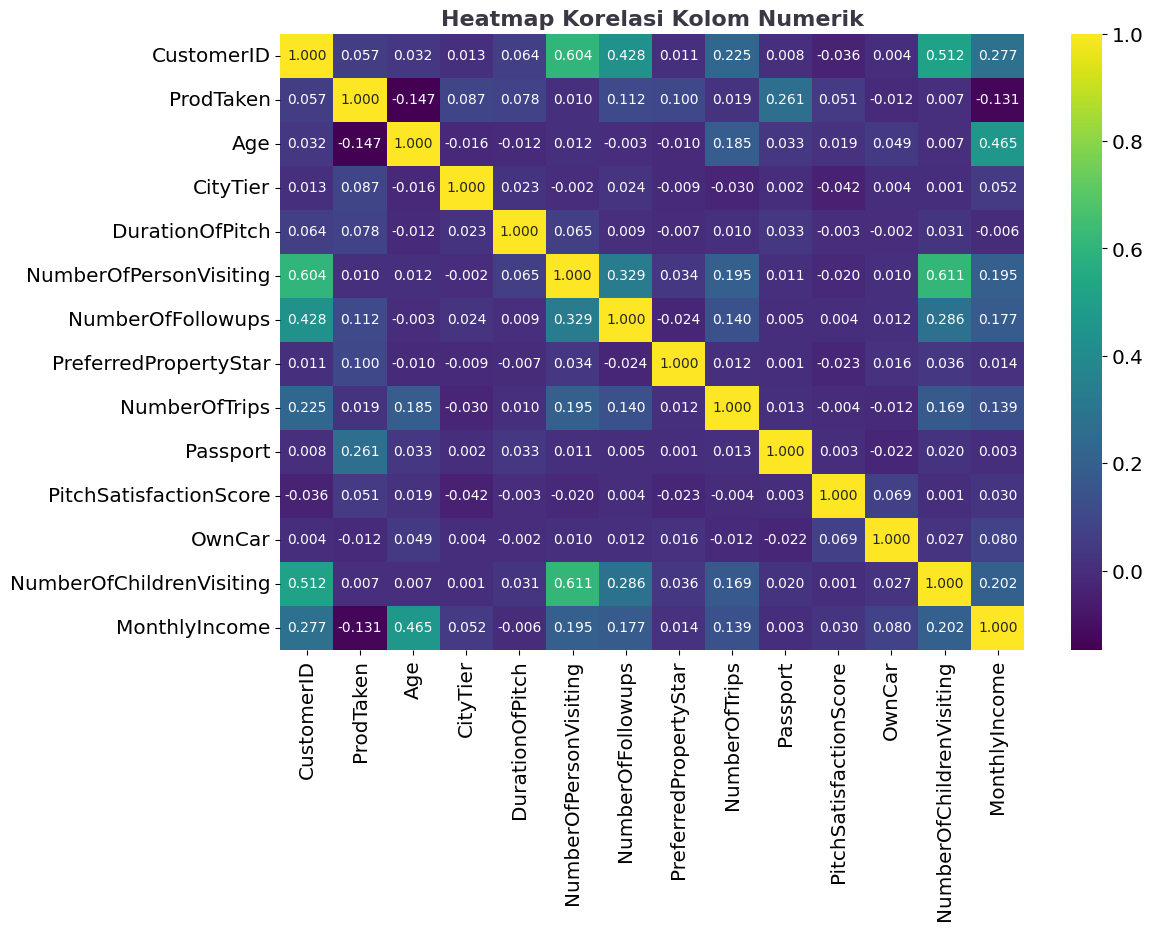

In [20]:
# Skips CustomerID column
plt.title('Heatmap Korelasi Kolom Numerik', color='#3C3744', fontsize=16, fontweight='bold', y=1)
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.3f')
plt.show()

Tidak ada 2 fitur yang berkorelasi kuat (>0.7), maka kemungkinan tidak ada fitur yang redundan. Namun korelasi tertinggi antara fitur NumberofChildrenVisiting dengan fitur NumberOfPersonVisiting sebesar 0.61

Fitur ProdTaken (target) berkorelasi positif dengan fitur kepemilikan passport, number of follow ups dan preferred property star.

Fitur kepemilikan passport memiliki korelasi paling tinggi dengan fitur ProdTaken (target) dengan nilai (0.26), maka fitur tersebut harus dipertahankan. (jumlah pelanggan yang memiliki passpor dan tidak, cukup timpang)

Semakin tinggi jumlah follow-up semakin besar potensi customer untuk membeli paket travel baru. Nilai korelasi ProdTaken terhadap NumberofFollowup 0.11

Customer yang berpotensi membeli paket baru adalah customer yang memilih properti bintang 5, semakin tinggi jumlah bintang, semakin tinggi juga potensi customer untuk membeli paket baru. Nilai korelasi ProdTaken dan PropertyStar 0.10

Fitur ProdTaken (target) berkorelasi negatif dengan Age dan Monthly Income.

Korelasi negatif antara fitur ProdTaken (produk yang dibeli) dengan Age, berarti bahwa semakin muda usia customer maka semakin besar kemungkinan mereka untuk membeli produk tersebut. (-0.15)

Korelasi negatif antara fitur ProdTaken (produk yang dibeli) dengan Monthly Income, berarti bahwa semakin rendah pendapatan bulanannya, semakin besar kemungkinan mereka untuk membeli produk tersebut. (-0.13)

Korelasi tertinggi antara fitur NumberofChildrenVisiting dengan fitur NumberOfPersonVisiting sebesar 0.61



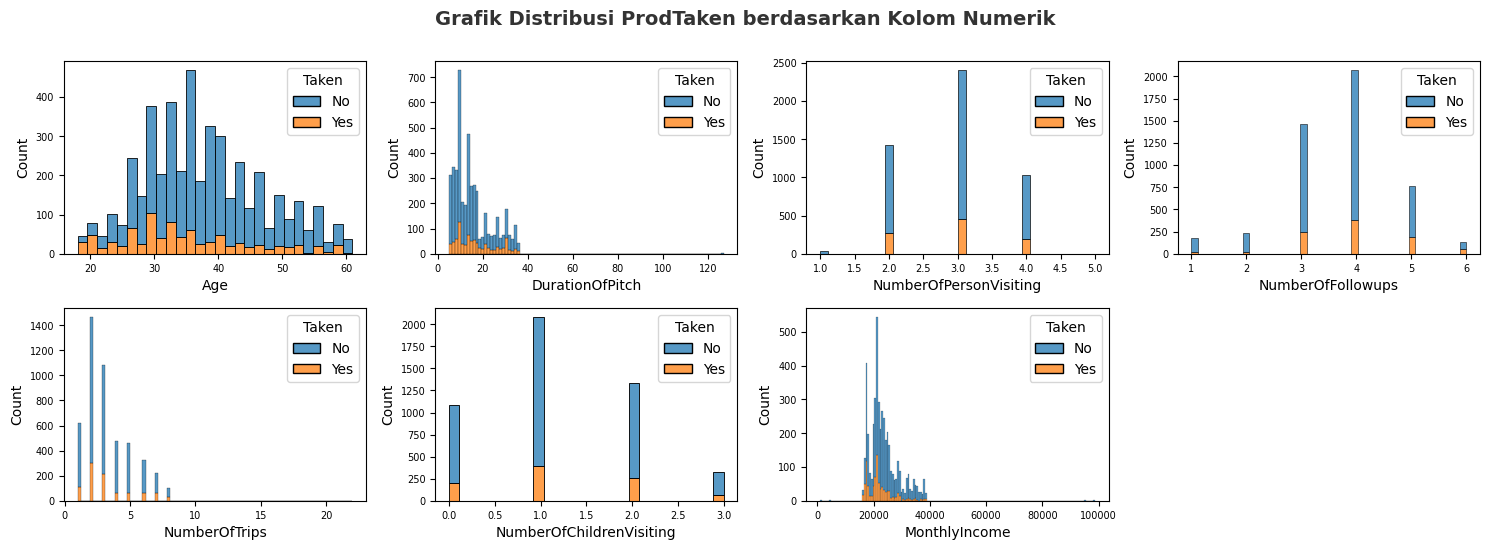

In [21]:
plt.figure(figsize=(15,10))
plt.suptitle('Grafik Distribusi ProdTaken berdasarkan Kolom Numerik', fontsize=14, fontweight='bold', alpha=0.8, y=1.)


for i, col in enumerate(nums[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)
    sns.histplot(data=df, x=col, hue='ProdTaken', multiple='stack')

    # Custom legend
    legend = plt.gca().get_legend()
    legend.set_title('Taken')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')

plt.tight_layout()

plt.show()

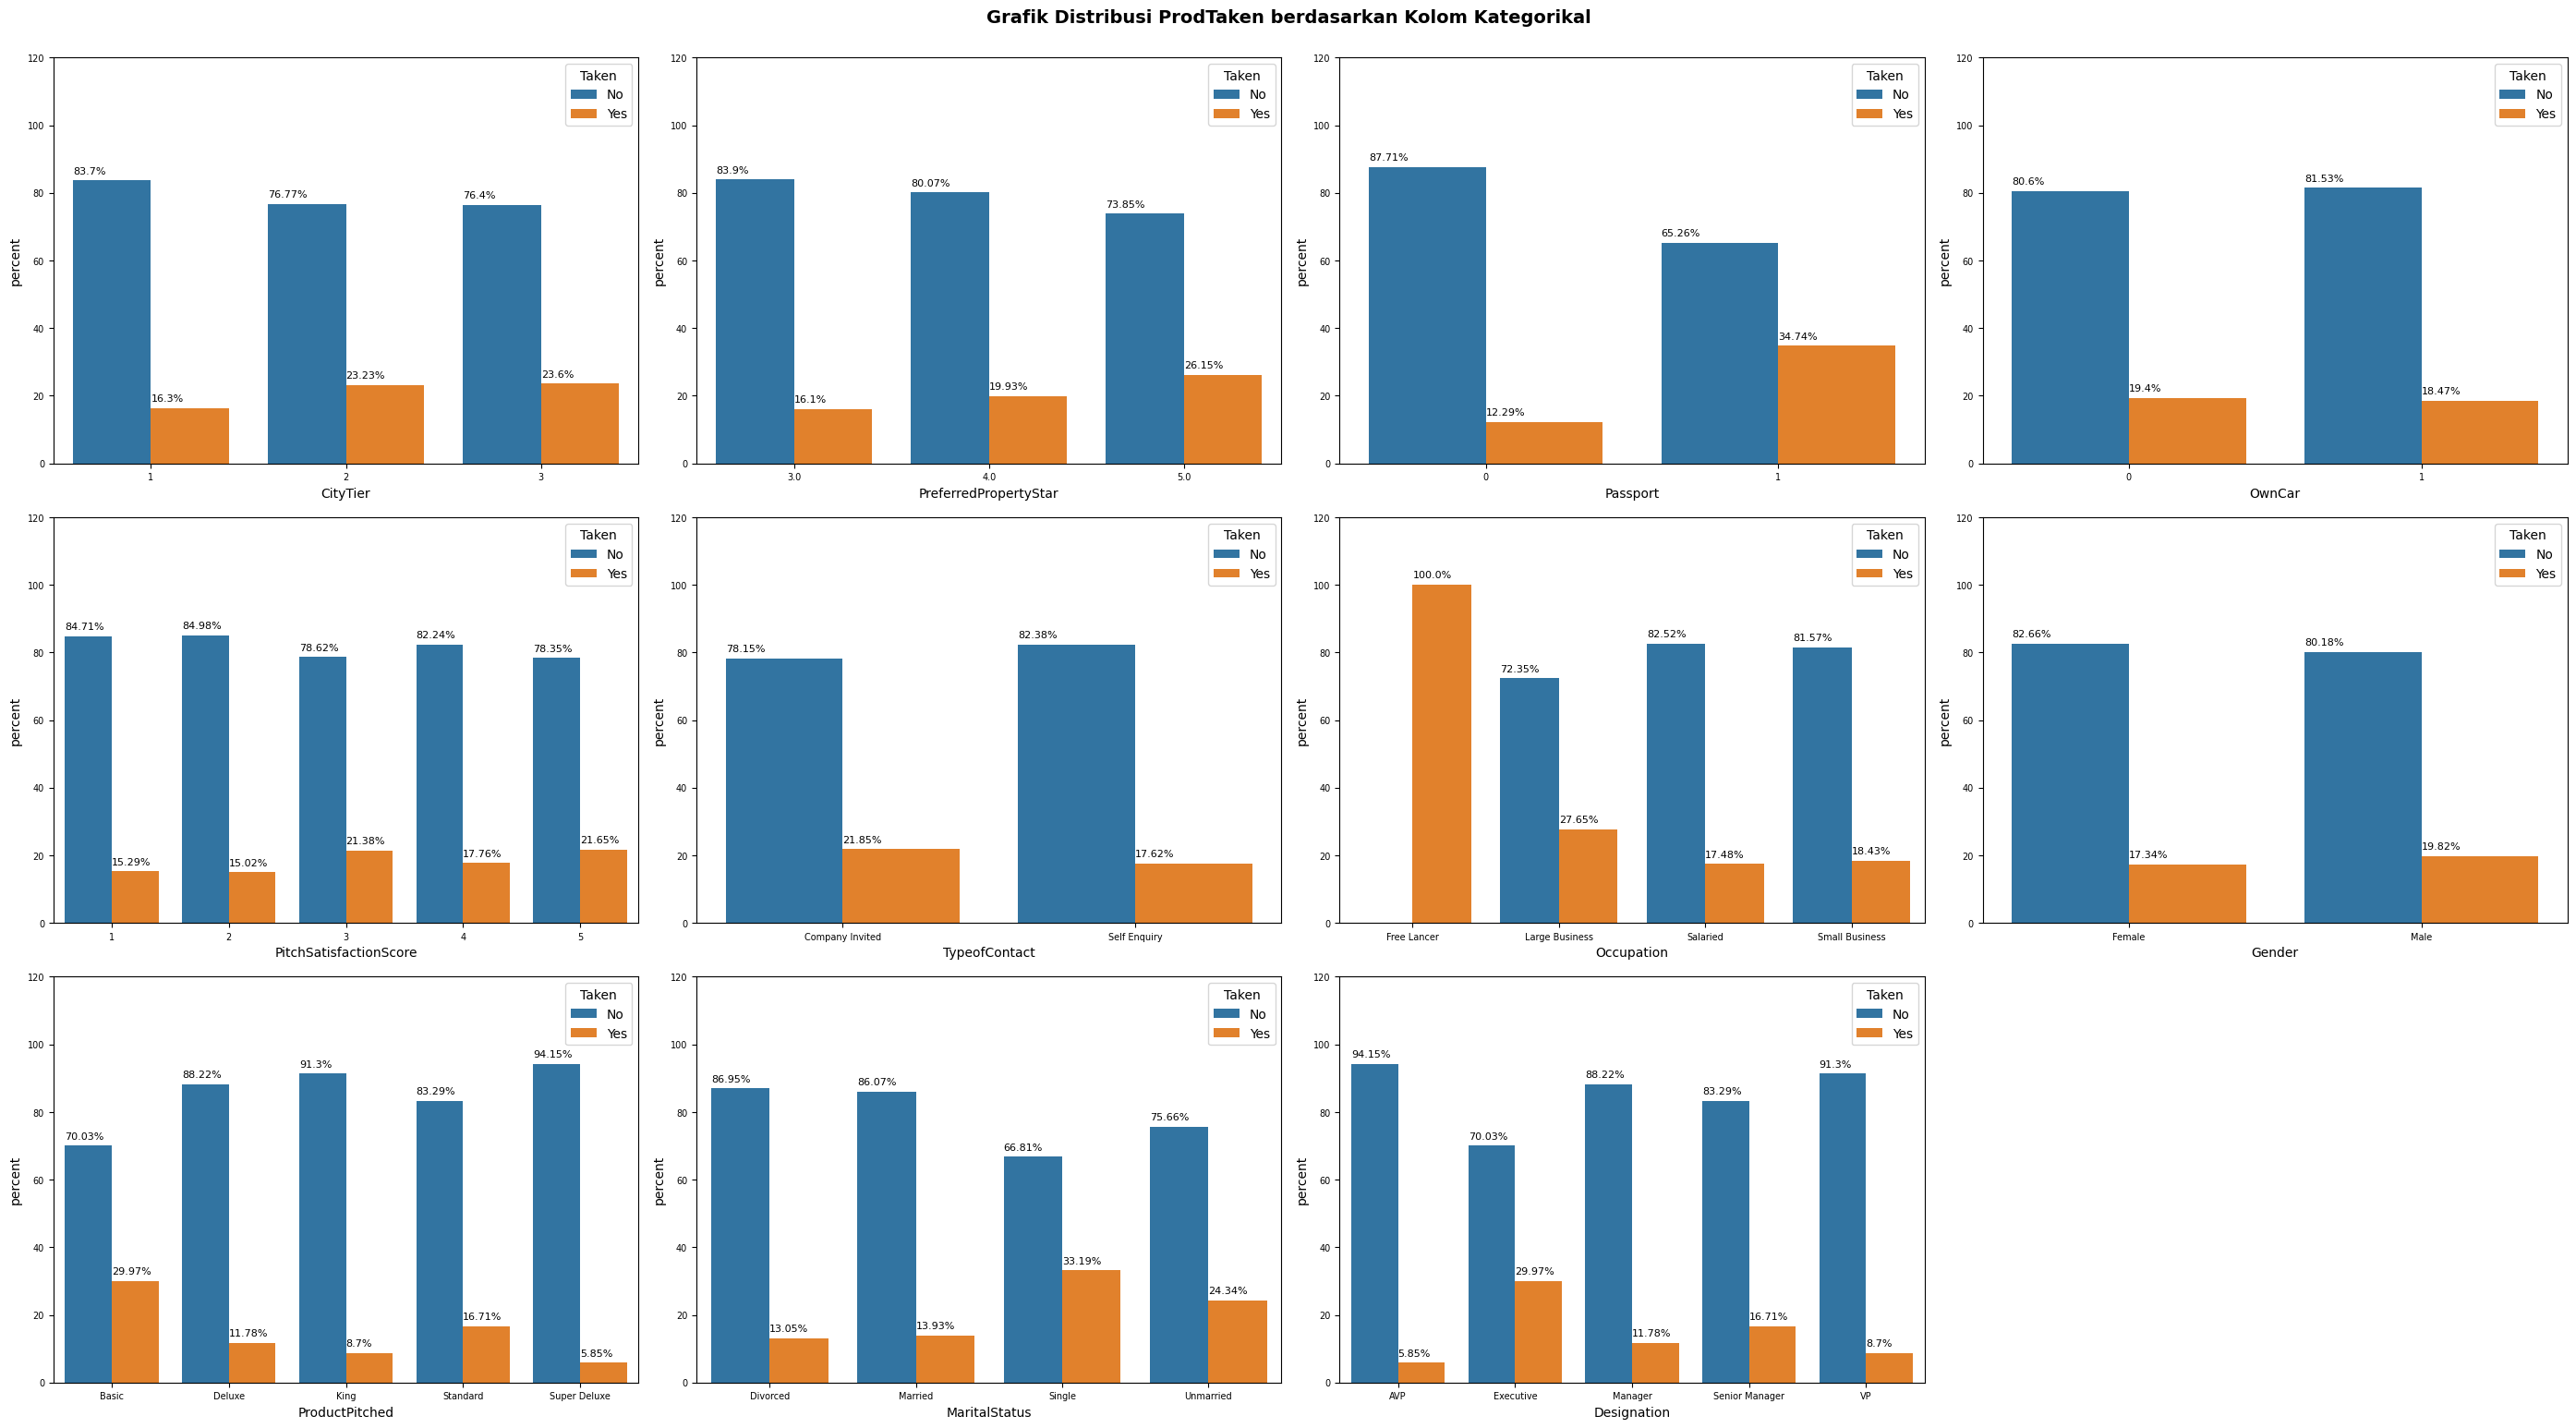

In [22]:
plt.figure(figsize=(28,20))
plt.suptitle('Grafik Distribusi ProdTaken berdasarkan Kolom Kategorikal', fontsize=14, fontweight='bold', y=1)


for i, col in enumerate(cats[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.ylabel('Percentage')
    df1 = df.groupby(col)['ProdTaken'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.barplot(x=col, y='percent', hue='ProdTaken', data=df1)
    g.set_ylim(0, 120)
    g.set_yticks(range(0,121,20))
    g.legend(title='Taken')

    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()

        # Skips error due to Freelancer having 100% ProdTaken rate
        if np.isnan(txt_y):
            continue
        g.text(txt_x, txt_y + 2, txt, ha='left', size=8)

        # Custom legend
        legend = plt.gca().get_legend()
        legend.set_title('Taken')
        legend.get_texts()[0].set_text('No')
        legend.get_texts()[1].set_text('Yes')

plt.tight_layout()

plt.show()

Performansi salesman dalam menawarkan product tidak terlalu berpengaruh signifikan terhadap keputusan akhir konsumen untuk membeli product atau tidak, dapat dilihat pada plot bahwa Jumlah customer yang membeli product namun memberikan nilai kepuasan pitching salesman 3 lebih banyak dibandingkan dengan yang memberi nilai kepuasan 5

In [23]:
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='ProdTaken')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 2. Data Pre-Processing

## 2.1 Data Cleansing

Sebelum langkah selanjutnya, kolom CustomerID akan didrop terlebih dahulu karena data berupa index dan bukan fitur

Kolom Gender yang memiliki 3 nilai, telah diubah menjadi bernilai Male atau Female saja

Kolom Marital Status akan disederhanakan menjadi Single dan Married, dengan Single mencakup Divorced dan Unmarried

Kolom Designation akan disederhanakan dengan meleburkan Senior Manager ke dalam Manager dan meleburkan AVP ke dalam VP

Baris customer yang memiliki Occupation 'Free Lancer' akan didrop karena hanya terdapat 2 baris data

In [24]:
df1 = df.copy()

# Conditional to avoid errors on repeated cell runs
if 'CustomerID' in df1.columns:
    df1.drop('CustomerID', axis=1, inplace=True)
if 'CustomerID' in nums:
    nums.remove('CustomerID')
df1.replace(['Divorced', 'Unmarried'], 'Single', inplace=True)
df1.replace(['Senior Manager', 'AVP'], ['Manager', 'VP'], inplace=True)
df1.drop(df1[df1.Occupation == 'Free Lancer'].index, inplace=True)

### 2.1.1 Handling Missing Values and Duplicates

In [25]:
fill_modus = ['TypeofContact', 'PreferredPropertyStar', 'NumberOfFollowups',
              'NumberOfTrips', 'NumberOfChildrenVisiting']
fill_median = ['DurationOfPitch', 'MonthlyIncome']
fill_mean = ['Age']

for col in fill_modus:
    df1[col].fillna(df[col].mode()[0], inplace=True)

for col in fill_median:
    df1[col].fillna(df[col].median(), inplace=True)

for col in fill_mean:
    df1[col].fillna(df[col].mean(), inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4886 non-null   int64  
 1   Age                       4886 non-null   float64
 2   TypeofContact             4886 non-null   object 
 3   CityTier                  4886 non-null   int64  
 4   DurationOfPitch           4886 non-null   float64
 5   Occupation                4886 non-null   object 
 6   Gender                    4886 non-null   object 
 7   NumberOfPersonVisiting    4886 non-null   int64  
 8   NumberOfFollowups         4886 non-null   float64
 9   ProductPitched            4886 non-null   object 
 10  PreferredPropertyStar     4886 non-null   float64
 11  MaritalStatus             4886 non-null   object 
 12  NumberOfTrips             4886 non-null   float64
 13  Passport                  4886 non-null   int64  
 14  PitchSat

pada bagian 1.1 sebelumnya terdapat missing values yang akan ditangani dengan mengisi nilai kosong. Kolom dengan sebaran skew seperti DurationOfPitch dan MonthlyIncome diisi dengan median. Kolom age diisi dengan mean. Sisanya diisi dengan modus.

In [26]:
dupes = df1.duplicated()
print(f'Total Duplicate Rows: {dupes.sum()}')
dupes_percent = round(df1[dupes].shape[0] / df1.shape[0] * 100, 1)
print(f'Rasio baris data duplikat adalah {dupes_percent}% dari total baris')

Total Duplicate Rows: 141
Rasio baris data duplikat adalah 2.9% dari total baris


In [27]:
df1.drop_duplicates(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4745 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4745 non-null   int64  
 1   Age                       4745 non-null   float64
 2   TypeofContact             4745 non-null   object 
 3   CityTier                  4745 non-null   int64  
 4   DurationOfPitch           4745 non-null   float64
 5   Occupation                4745 non-null   object 
 6   Gender                    4745 non-null   object 
 7   NumberOfPersonVisiting    4745 non-null   int64  
 8   NumberOfFollowups         4745 non-null   float64
 9   ProductPitched            4745 non-null   object 
 10  PreferredPropertyStar     4745 non-null   float64
 11  MaritalStatus             4745 non-null   object 
 12  NumberOfTrips             4745 non-null   float64
 13  Passport                  4745 non-null   int64  
 14  PitchSat

### 2.1.2 Handling Outliers

Dalam menangani nilai kolom-kolom yang memiliki outliers sesuai yang disebutkan pada bagian 1.2 sebelumnya, akan diamati perbedaan antara 2 metode yaitu metode IQR dan z-score

In [28]:
df_iqr = pd.DataFrame(index=range(df1.shape[0]))

for col in nums:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_lim = q1 - (1.5 * iqr)
    upper_lim = q3 + (1.5 * iqr)
    iqr_outlier = (df1[col] < lower_lim) | (df1[col] > upper_lim)
    df_iqr[col] = df1[col][iqr_outlier]

df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       0 non-null      float64
 1   DurationOfPitch           106 non-null    float64
 2   NumberOfPersonVisiting    3 non-null      float64
 3   NumberOfFollowups         296 non-null    float64
 4   NumberOfTrips             99 non-null     float64
 5   NumberOfChildrenVisiting  0 non-null      float64
 6   MonthlyIncome             345 non-null    float64
dtypes: float64(7)
memory usage: 259.6 KB


In [29]:
df_zscore = pd.DataFrame(index=range(df1.shape[0]))

for col in nums:
    z_score = np.abs(stats.zscore(df1[col], nan_policy='omit'))
    df_zscore[col] = df1[col][z_score > 3]

df_zscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       0 non-null      float64
 1   DurationOfPitch           2 non-null      float64
 2   NumberOfPersonVisiting    0 non-null      float64
 3   NumberOfFollowups         0 non-null      float64
 4   NumberOfTrips             4 non-null      float64
 5   NumberOfChildrenVisiting  0 non-null      float64
 6   MonthlyIncome             4 non-null      float64
dtypes: float64(7)
memory usage: 259.6 KB


Berdasarkan metode IQR, nilai yang dianggap sebagai outlier jumlahnya cukup signifikan sehingga dikhawatirkan akan membuang terlalu banyak data.

Untuk metode z-score akan coba diamati lagi nilai apa saja yang akan dibuang.

In [30]:
# Untuk melihat nilai apa saja yang dianggap outlier oleh zscore
df_zscore.dropna(how='all').dropna(how='all', axis=1).replace(np.nan, '-')

,DurationOfPitch,NumberOfTrips,MonthlyIncome
38,-,-,95000.0
142,-,-,1000.0
385,-,19.0,-
816,-,21.0,-
1434,126.0,-,-
2482,-,-,98678.0
2586,-,-,4678.0
2829,-,20.0,-
3260,-,22.0,-
3878,127.0,-,-


Berdasarkan pertimbangan sebelumnya, akan digunakan metode z-score yang dianggap sudah cukup untuk mendeteksi nilai yang sangat ekstrim sesuai yang ditunjukkan oleh tabel di atas.


In [31]:
# untuk drop outlier berdasar zscore
df1.drop(df_zscore.dropna(how='all').index, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4735 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4735 non-null   int64  
 1   Age                       4735 non-null   float64
 2   TypeofContact             4735 non-null   object 
 3   CityTier                  4735 non-null   int64  
 4   DurationOfPitch           4735 non-null   float64
 5   Occupation                4735 non-null   object 
 6   Gender                    4735 non-null   object 
 7   NumberOfPersonVisiting    4735 non-null   int64  
 8   NumberOfFollowups         4735 non-null   float64
 9   ProductPitched            4735 non-null   object 
 10  PreferredPropertyStar     4735 non-null   float64
 11  MaritalStatus             4735 non-null   object 
 12  NumberOfTrips             4735 non-null   float64
 13  Passport                  4735 non-null   int64  
 14  PitchSat

### 2.1.3 Feature Transformation

In [32]:
df1['Age_norm'] = MinMaxScaler().fit_transform(df1['Age'].values.reshape(len(df1), 1))
df1['Age_std'] = StandardScaler().fit_transform(df1['Age'].values.reshape(len(df1), 1))
Age1 = ['Age','Age_norm','Age_std']
df1[Age1].describe()

,Age,Age_norm,Age_std
count,4735.00,4735.00,4.74e+03
mean,37.59,0.46,-3.60e-17
std,9.12,0.21,1.00e+00
min,18.00,0.00,-2.15e+00
25%,31.00,0.30,-7.22e-01
50%,37.00,0.44,-6.43e-02
75%,43.00,0.58,5.94e-01
max,61.00,1.00,2.57e+00


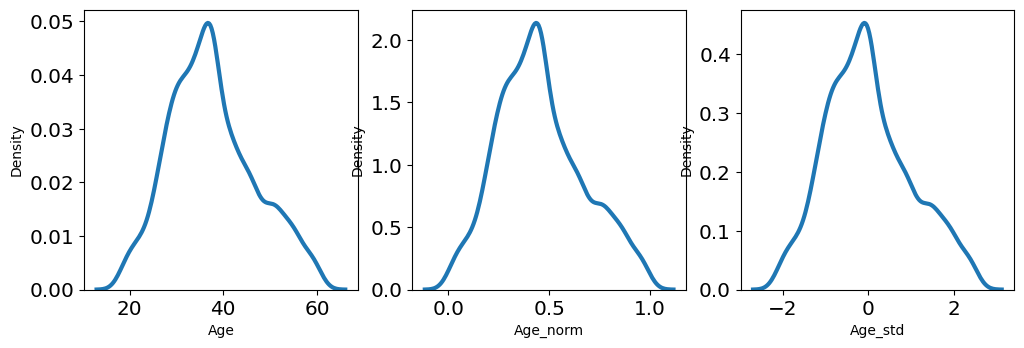

In [33]:
for i in range(len(Age1)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df1[Age1[i]])

Karena hasil transformasi memiliki bentuk sebaran yang relatif sama, akan digunakan nilai standardisasi

In [34]:
skew_col = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

for col in skew_col:
    col_name = 'log ' + col
    df1[col_name] = np.log(df1[col])
log =  ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'log DurationOfPitch', 'log NumberOfTrips', 'log MonthlyIncome']
df1[log].describe()

,DurationOfPitch,NumberOfTrips,MonthlyIncome,log DurationOfPitch,log NumberOfTrips,log MonthlyIncome
count,4735.00,4735.00,4735.00,4735.00,4735.00,4735.00
mean,15.34,3.18,23525.94,2.60,1.01,10.05
std,8.02,1.76,5029.37,0.50,0.56,0.20
min,5.00,1.00,16009.00,1.61,0.00,9.68
25%,9.00,2.00,20482.00,2.20,0.69,9.93
50%,13.00,3.00,22347.00,2.56,1.10,10.01
75%,19.00,4.00,25389.00,2.94,1.39,10.14
max,36.00,8.00,38677.00,3.58,2.08,10.56


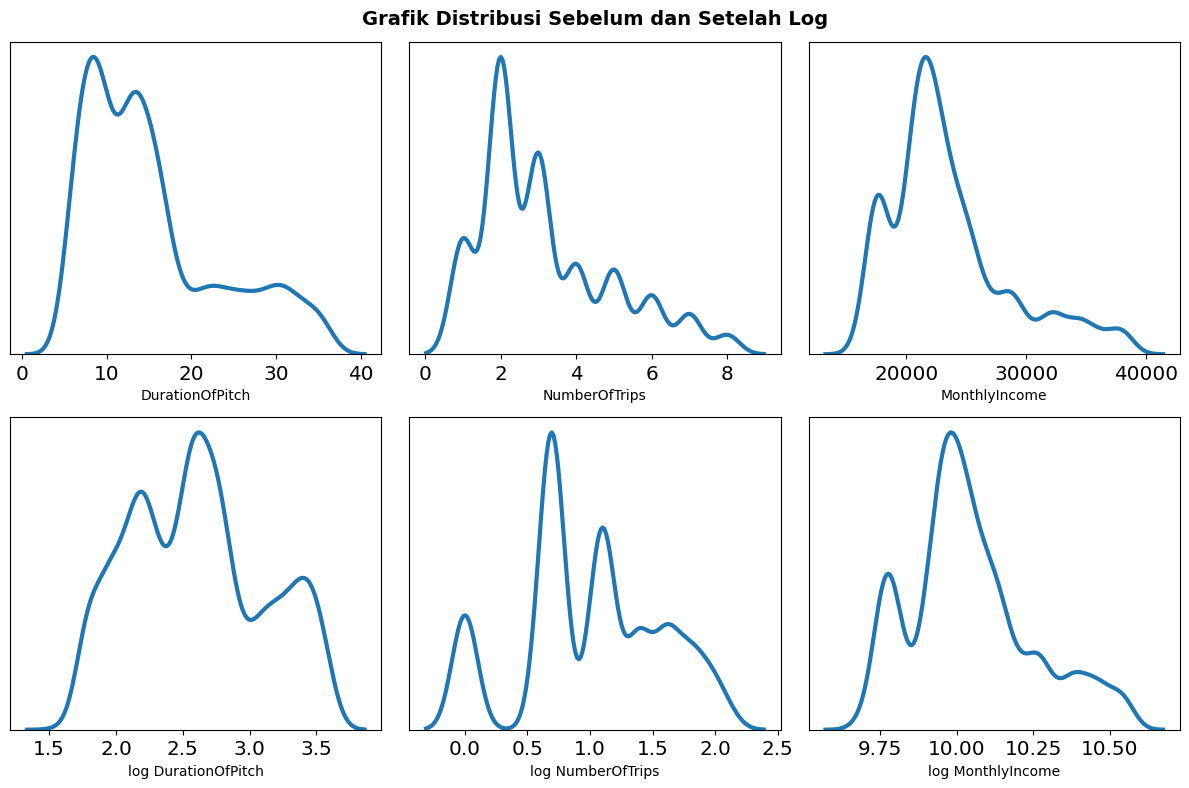

In [35]:
plt.suptitle('Grafik Distribusi Sebelum dan Setelah Log', fontsize=14, fontweight='bold')
for i in range(len(log)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df1[log[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

Pada kolom dengan distribusi bersifat skew, dilakukan transformasi log terlebih dahulu sebelum standardisasi

### Standardisasi features log DurationOfPitch,log NumberOfTrips, dan log MonthlyIncome

In [36]:
df1['DOP_std'] = StandardScaler().fit_transform(df1['log DurationOfPitch'].values.reshape(len(df1), 1))
df1['NOT_std'] = StandardScaler().fit_transform(df1['log NumberOfTrips'].values.reshape(len(df1), 1))
df1['Income_std']= StandardScaler().fit_transform(df1['log MonthlyIncome'].values.reshape(len(df1), 1))
log_std = ['log DurationOfPitch','log NumberOfTrips','log MonthlyIncome','DOP_std','NOT_std','Income_std']
DOP = [' log DurationOfPitch','DOP_std']
NOT = ['log NumberOfTrips','NOT_std']
Income = ['log MonthlyIncome','Income_std']
df1[log_std].describe()

,log DurationOfPitch,log NumberOfTrips,log MonthlyIncome,DOP_std,NOT_std,Income_std
count,4735.00,4735.00,4735.00,4.74e+03,4.74e+03,4.74e+03
mean,2.60,1.01,10.05,-6.18e-16,4.80e-17,8.31e-15
std,0.50,0.56,0.20,1.00e+00,1.00e+00,1.00e+00
min,1.61,0.00,9.68,-1.99e+00,-1.79e+00,-1.82e+00
25%,2.20,0.69,9.93,-8.13e-01,-5.57e-01,-5.89e-01
50%,2.56,1.10,10.01,-7.74e-02,1.66e-01,-1.53e-01
75%,2.94,1.39,10.14,6.82e-01,6.79e-01,4.86e-01
max,3.58,2.08,10.56,1.96e+00,1.92e+00,2.59e+00


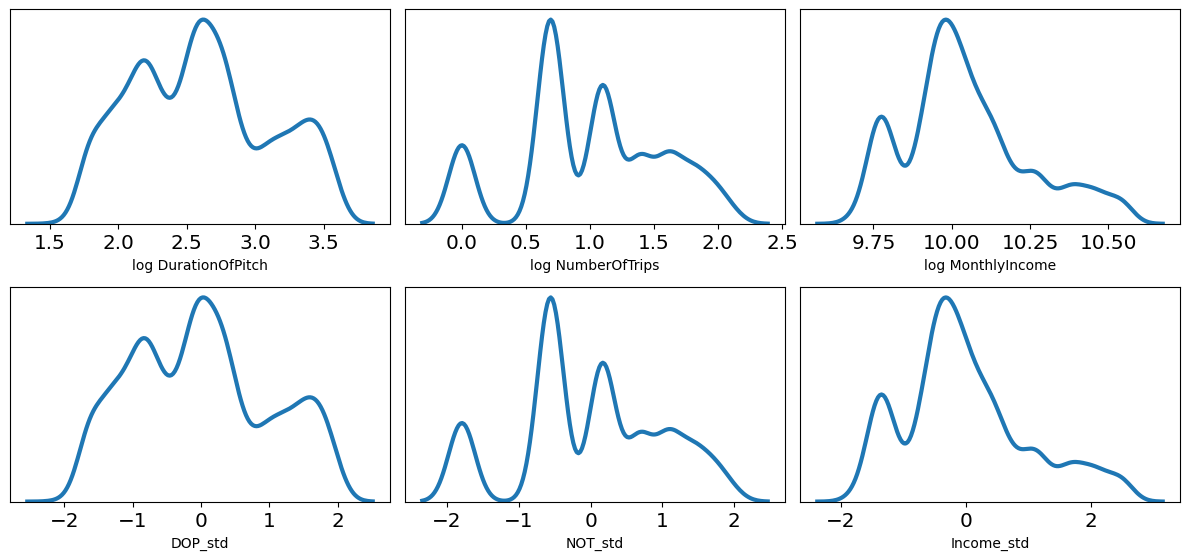

In [37]:
for i in range(len(log_std)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df1[log_std[i]])
    plt.ylabel('')
    plt.yticks([])

plt.tight_layout()

In [38]:
drop_columns = ['Age','Age_norm','DurationOfPitch','MonthlyIncome','NumberOfTrips', 'log DurationOfPitch','log MonthlyIncome','log NumberOfTrips']
df1 = df1.drop(drop_columns, axis=1)
df1.head()

,ProdTaken,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,Age_std,DOP_std,NOT_std,Income_std
0,1,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,3.0,Single,1,2,1,0.0,Manager,3.74e-01,-1.62,-1.79,-0.47
1,0,Company Invited,1,Salaried,Male,3,4.0,Deluxe,4.0,Single,0,3,1,2.0,Manager,1.25e+00,0.07,-0.56,-0.68
3,0,Company Invited,1,Salaried,Female,2,3.0,Basic,3.0,Single,1,5,1,1.0,Executive,-5.03e-01,-0.81,-0.56,-1.26
4,0,Self Enquiry,1,Small Business,Male,2,3.0,Basic,4.0,Single,0,5,1,0.0,Executive,3.95e-03,-1.05,-1.79,-1.11
5,0,Company Invited,1,Salaried,Male,3,3.0,Basic,3.0,Single,0,5,1,1.0,Executive,-6.12e-01,-1.05,-1.79,-1.22


### 2.1.4 Feature Encoding

### Strategi  encoding
* `TypeofContact`,`Gender`,`MaritalStatus`,`ProductPitched` \: Label Encoding
*  `Occupation`, `Designation` \: One Hot Encoding


In [39]:
le = LabelEncoder()
binary_encode = ['TypeofContact', 'Gender', 'MaritalStatus']

for col in binary_encode:
    df1[col] = le.fit_transform(df1[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'Hasil encode pada kolom {col}: {mapping}')

Hasil encode pada kolom TypeofContact: {'Company Invited': 0, 'Self Enquiry': 1}
Hasil encode pada kolom Gender: {'Female': 0, 'Male': 1}
Hasil encode pada kolom MaritalStatus: {'Married': 0, 'Single': 1}


In [40]:
map_encode = {'ProductPitched' : {'Basic': 0, 'Standard': 1, 'Deluxe': 2, 'Super Deluxe': 3, 'King': 4}}

for col, mapping in map_encode.items():
    df1[col] = df1[col].map(mapping)

In [41]:
df1 = pd.get_dummies(df1, columns=['Occupation','Designation'])
df1.head(5)

,ProdTaken,TypeofContact,CityTier,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Age_std,DOP_std,NOT_std,Income_std,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Designation_Executive,Designation_Manager,Designation_VP
0,1,1,3,0,3,3.0,2,3.0,1,1,2,1,0.0,3.74e-01,-1.62,-1.79,-0.47,0,1,0,0,1,0
1,0,0,1,1,3,4.0,2,4.0,1,0,3,1,2.0,1.25e+00,0.07,-0.56,-0.68,0,1,0,0,1,0
3,0,0,1,0,2,3.0,0,3.0,1,1,5,1,1.0,-5.03e-01,-0.81,-0.56,-1.26,0,1,0,1,0,0
4,0,1,1,1,2,3.0,0,4.0,1,0,5,1,0.0,3.95e-03,-1.05,-1.79,-1.11,0,0,1,1,0,0
5,0,0,1,1,3,3.0,0,3.0,1,0,5,1,1.0,-6.12e-01,-1.05,-1.79,-1.22,0,1,0,1,0,0


### 2.1.5 Handling Class Imbalance

In [42]:
# Pemisahan kolom kategorikal dan numerikal di df1
nums1 = ['Age_std', 'DOP_std', 'NumberOfPersonVisiting', 'NumberOfFollowups',
         'NOT_std', 'NumberOfChildrenVisiting', 'Income_std']

cats1 = ['ProdTaken', 'TypeofContact', 'CityTier', 'Gender', 'ProductPitched',
         'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
         'OwnCar', 'Occupation_Large Business', 'Occupation_Salaried',
         'Occupation_Small Business', 'Designation_Executive', 'Designation_Manager',
         'Designation_VP']

In [43]:
# pemisahan features vs target
X = df1.drop(['ProdTaken'], axis = 1)
y = df1[['ProdTaken']]

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4735 entries, 0 to 4887
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TypeofContact              4735 non-null   int64  
 1   CityTier                   4735 non-null   int64  
 2   Gender                     4735 non-null   int64  
 3   NumberOfPersonVisiting     4735 non-null   int64  
 4   NumberOfFollowups          4735 non-null   float64
 5   ProductPitched             4735 non-null   int64  
 6   PreferredPropertyStar      4735 non-null   float64
 7   MaritalStatus              4735 non-null   int64  
 8   Passport                   4735 non-null   int64  
 9   PitchSatisfactionScore     4735 non-null   int64  
 10  OwnCar                     4735 non-null   int64  
 11  NumberOfChildrenVisiting   4735 non-null   float64
 12  Age_std                    4735 non-null   float64
 13  DOP_std                    4735 non-null   float

In [45]:
# mengubah dtype kolom diskrit agar smote tidak membuat nilai sintetik bersifat kontinu
X[['NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting']] = X[['NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting']].astype('int64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4735 entries, 0 to 4887
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TypeofContact              4735 non-null   int64  
 1   CityTier                   4735 non-null   int64  
 2   Gender                     4735 non-null   int64  
 3   NumberOfPersonVisiting     4735 non-null   int64  
 4   NumberOfFollowups          4735 non-null   int64  
 5   ProductPitched             4735 non-null   int64  
 6   PreferredPropertyStar      4735 non-null   int64  
 7   MaritalStatus              4735 non-null   int64  
 8   Passport                   4735 non-null   int64  
 9   PitchSatisfactionScore     4735 non-null   int64  
 10  OwnCar                     4735 non-null   int64  
 11  NumberOfChildrenVisiting   4735 non-null   int64  
 12  Age_std                    4735 non-null   float64
 13  DOP_std                    4735 non-null   float

Karena keterbatasan jumlah data, kami tidak akan menggunakan undersampling untuk menangani ketimpangan data.

Antara random oversampler dan SMOTE oversampler, kami menggunakan SMOTE oversampler untuk memperkenalkan data baru secara sintetik

In [46]:
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape, y_smote.shape)

print('Original')
print(y.value_counts())
print('\n')

print('SMOTE')
print(y_smote.value_counts())
print('\n')

(7690, 22) (7690, 1)
Original
ProdTaken
0            3845
1             890
dtype: int64


SMOTE
ProdTaken
0            3845
1            3845
dtype: int64




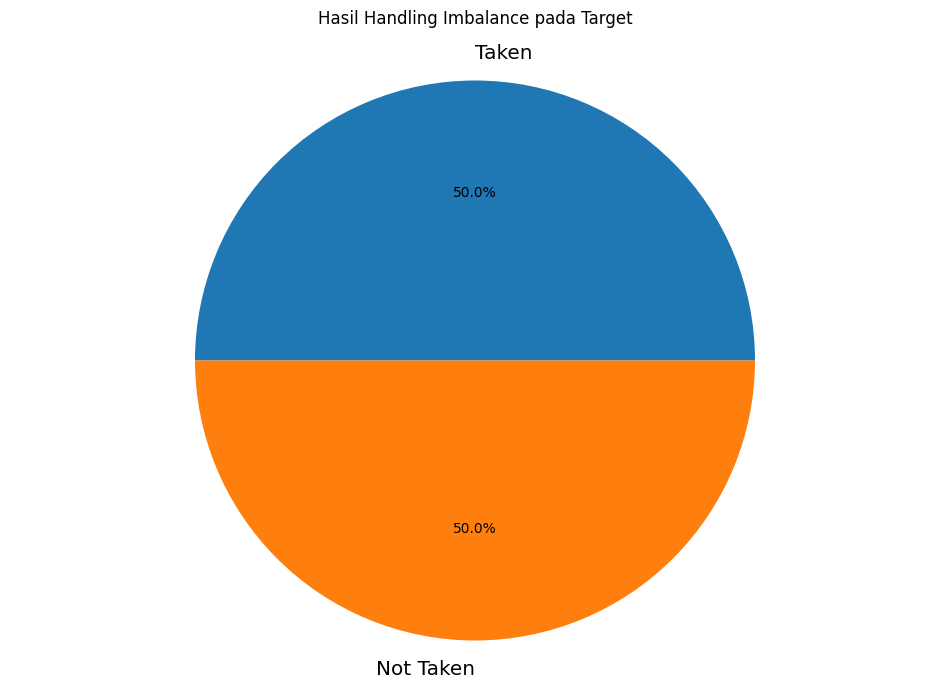

In [47]:
plt.title('Hasil Handling Imbalance pada Target\n')
plt.pie(y_smote.value_counts(), labels=['Taken', 'Not Taken'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

## 2.2 Feature Engineering

### 2.2.1 Feature Selection

Sebelum dilakukan feature selection, akan diamati kembali pengaruh fitur terhadap target pada dataframe yang telah dibersihkan

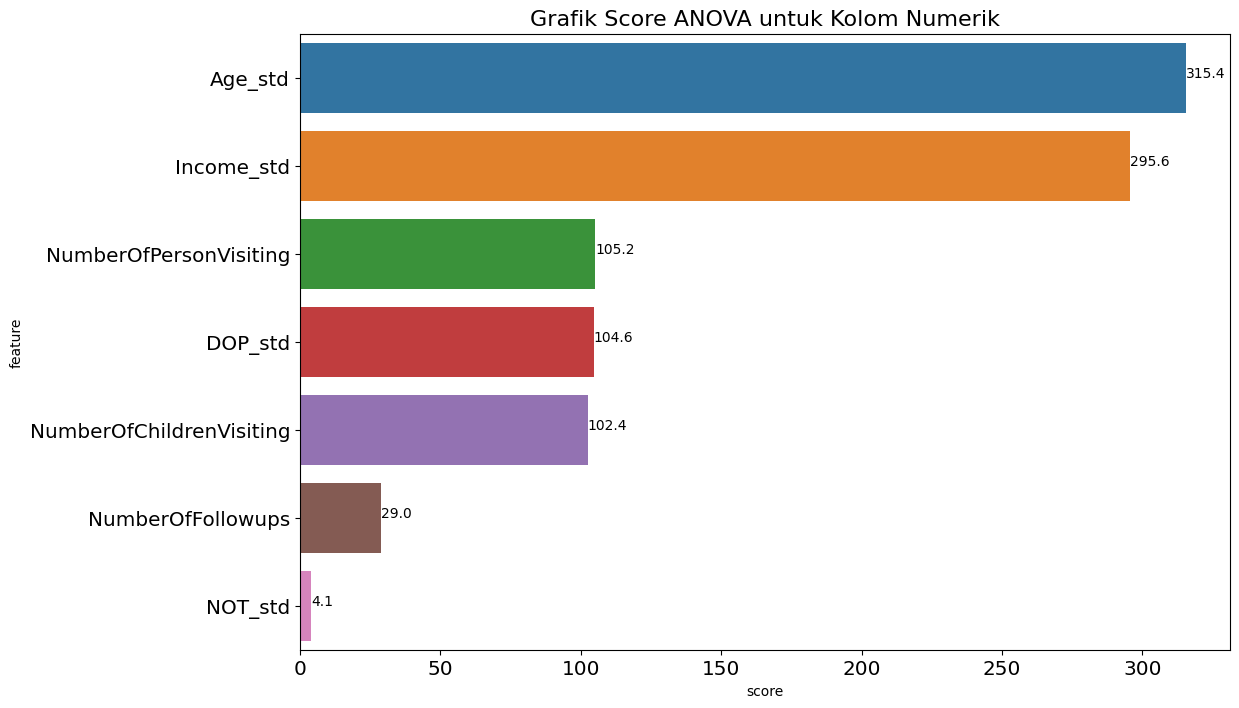

In [48]:
anova = SelectKBest(f_classif, k='all')
anova.fit_transform(X_smote[nums1], y_smote)
anova_score = zip(anova.scores_, nums1)
df_ano = pd.DataFrame(anova_score, columns=['score', 'feature']).sort_values(by='score', ascending=False)

plt.title('Grafik Score ANOVA untuk Kolom Numerik', fontsize=16)
sns.barplot(data=df_ano, y='feature', x='score')
for i, score in enumerate(df_ano['score']):
    plt.text(score, i, round(score,1))
plt.show()

Berdasarkan nilai score ANOVA, fitur NumberOfTrips dan NumberOfChildrenVisiting memiliki nilai relevansi yang kurang kuat terhadap target dibanding fitur numerik lainnya.

Fitur NumberOfChildrenVisiting akan digunakan untuk membuat fitur baru untuk melihat perilaku customer berdasarkan adanya anak-anak atau tidak

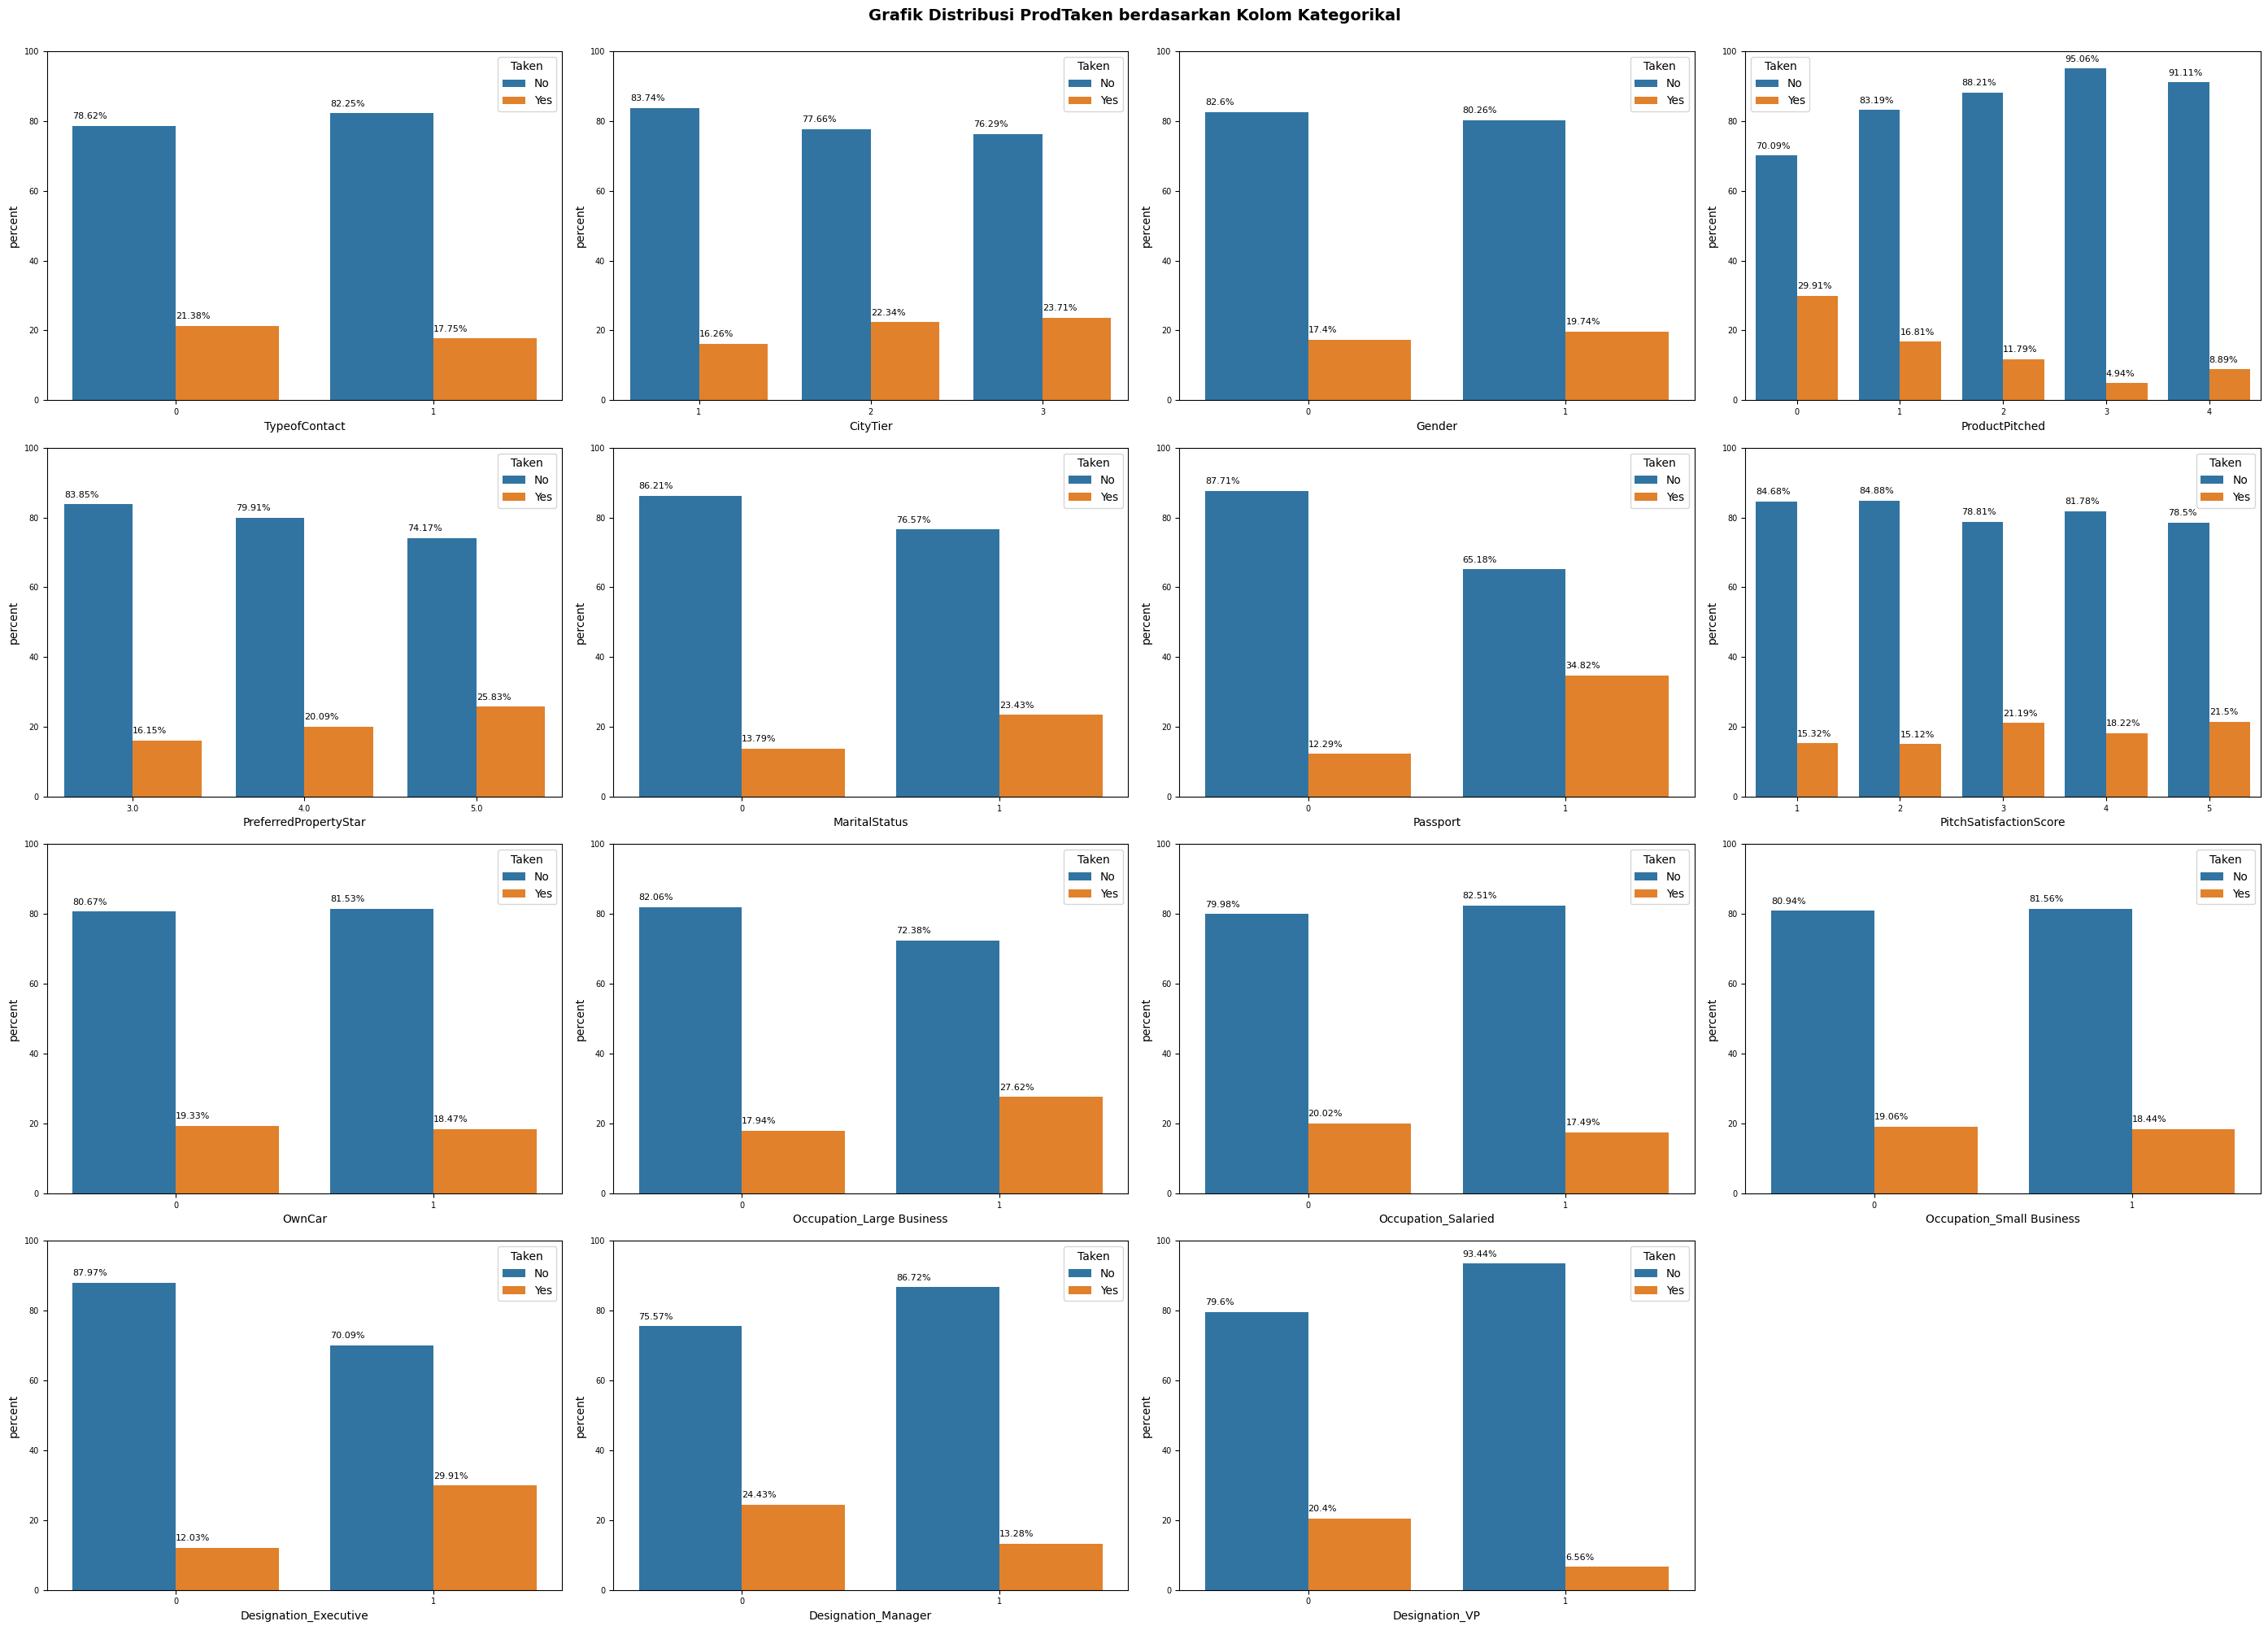

In [49]:
plt.figure(figsize=(28,20))
plt.suptitle('Grafik Distribusi ProdTaken berdasarkan Kolom Kategorikal', fontsize=14, fontweight='bold', y=1)

for i, col in enumerate(cats1[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.ylabel('Percentage')
    dfx = df1.groupby(col)['ProdTaken'].value_counts(normalize=True)
    dfx = dfx.mul(100)
    dfx = dfx.rename('percent').reset_index()

    g = sns.barplot(x=col, y='percent', hue='ProdTaken', data=dfx)
    g.set_ylim(0, 100)
    g.set_yticks(range(0,101,20))
    g.legend(title='Taken')

    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()

        # Skips error due to Freelancer having 100% ProdTaken rate
        if np.isnan(txt_y):
            continue
        g.text(txt_x, txt_y + 2, txt, ha='left', size=8)

        # Custom legend
        legend = plt.gca().get_legend()
        legend.set_title('Taken')
        legend.get_texts()[0].set_text('No')
        legend.get_texts()[1].set_text('Yes')

plt.tight_layout()

plt.show()

Untuk kolom kategorikal, semua fitur akan digunakan

In [50]:
drop_fitur = ['NOT_std']

# Hapus nama kolom dari list
for col in drop_fitur:
    if col in cats1:
        cats1.remove(col)
    if col in nums1:
        nums1.remove(col)

X_smote.drop(drop_fitur, axis=1, inplace=True)
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7690 entries, 0 to 7689
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TypeofContact              7690 non-null   int64  
 1   CityTier                   7690 non-null   int64  
 2   Gender                     7690 non-null   int64  
 3   NumberOfPersonVisiting     7690 non-null   int64  
 4   NumberOfFollowups          7690 non-null   int64  
 5   ProductPitched             7690 non-null   int64  
 6   PreferredPropertyStar      7690 non-null   int64  
 7   MaritalStatus              7690 non-null   int64  
 8   Passport                   7690 non-null   int64  
 9   PitchSatisfactionScore     7690 non-null   int64  
 10  OwnCar                     7690 non-null   int64  
 11  NumberOfChildrenVisiting   7690 non-null   int64  
 12  Age_std                    7690 non-null   float64
 13  DOP_std                    7690 non-null   float

### 2.2.2 Feature Extraction

NumberOfChildrenVisiting akan didrop dan digantikan oleh fitur baru HasKids, apakah mereka membawa anak atau tidak

In [51]:
X_smote['HasKids'] = np.where(X_smote['NumberOfChildrenVisiting'] > 0, 1, 0)
cats1.append('HasKids')

X_smote.drop('NumberOfChildrenVisiting', axis=1, inplace=True)
nums1.remove('NumberOfChildrenVisiting')

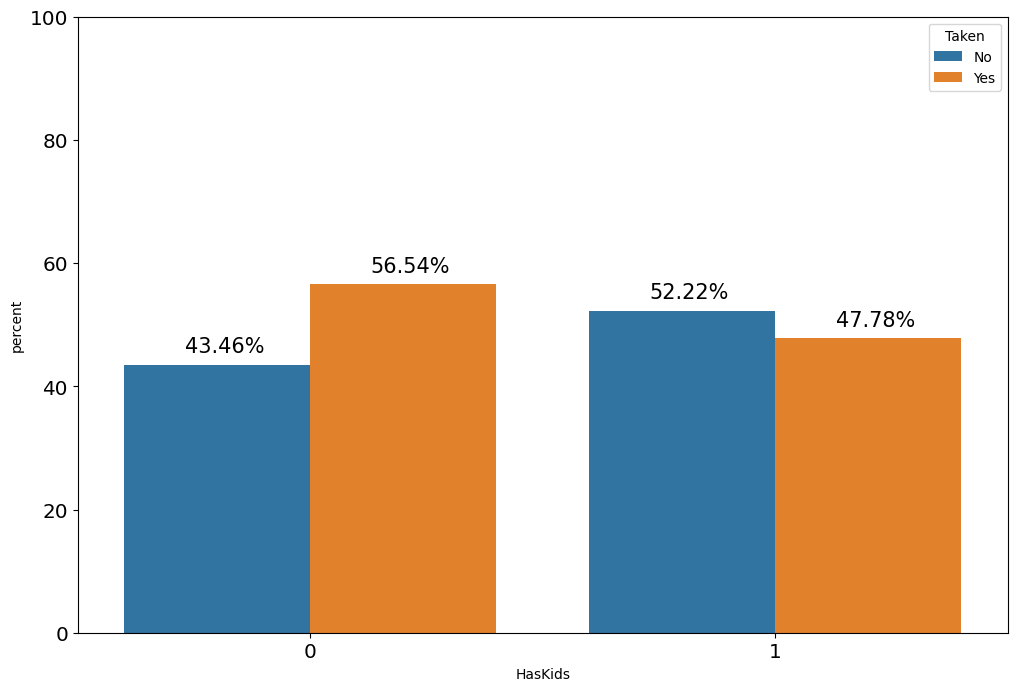

In [52]:
dfx = pd.concat([X_smote, y_smote], axis=1).groupby('HasKids')['ProdTaken'].value_counts(normalize=True)
dfx = dfx.mul(100)
dfx = dfx.rename('percent').reset_index()

g = sns.barplot(x='HasKids', y='percent', hue='ProdTaken', data=dfx)
g.set_ylim(0, 100)
g.set_yticks(range(0,101,20))
g.legend(title='Taken')

for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()

    g.text(txt_x + .13, txt_y + 2, txt, ha='left', size=15)

    # Custom legend
    legend = plt.gca().get_legend()
    legend.set_title('Taken')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')

# 3. Machine Learning Modeling and Evaluation

## 3.1 Preparation

Sebelum dilakukan modeling, akan dilakukan import library dan fungsi yang akan digunakan pada bagian ini

In [53]:
# Import library khusus bagian machine learning
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier

Untuk membantu proses pemilihan model, dibuat dictionary kosong yang digunakan untuk menyimpan hasil dari model yang digunakan pada bagian ini

In [54]:
eval_score = {'model': [],
              'precision': [],
              'cv train': [],
              'cv test': [],
              'cv gap': []}

In [55]:
# Fungsi evaluasi model
def eval_classification(model, cv=5):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    eval_score['model'].append(str(model))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    eval_score['precision'].append(round(precision_score(y_test, y_pred), 2))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=cv, scoring='precision', return_train_score=True)
    train_res = score['train_score'].mean()
    test_res = score['test_score'].mean()
    print(f'\n{cv}-fold cross validation')
    print(f'precision (crossval train): {train_res:.2f}')
    print(f'precision (crossval test): {test_res:.2f}')
    print(f'precision (train-test gap): {(train_res - test_res):.2f}')

    eval_score['cv train'].append(round(train_res, 2))
    eval_score['cv test'].append(round(test_res, 2))
    eval_score['cv gap'].append(round(train_res - test_res, 2))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

def conf_matrix_viz(y_test, model_prediksi, nama_model=''):
    cf_matrix = confusion_matrix(y_test,model_prediksi, labels=[1,0]).transpose()
    plt.figure(figsize=(8,5))
    ax = plt.subplot()
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_xlabel('Aktual')
    ax.set_ylabel('Prediksi')
    ax.set_title(f'Confusion Matrix {nama_model}')
    ax.xaxis.set_ticklabels(['1', '0'])
    ax.yaxis.set_ticklabels(['1', '0'])

### 3.1.1 Split Train-Test Data

In [56]:
# Menggunakan X, y hasil transformasi dari bagian sebelumnya
X = X_smote.copy()
y = y_smote.copy()

# Inisialisasi random state
random_state = 328

# Split data train dan test dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6152, 21) (1538, 21) (6152, 1) (1538, 1)


### 3.1.2 Model yang Akan Digunakan

Model yang akan digunakan adalah model klasifikasi untuk memprediksi customer yang akan membeli dan yang tidak. Jenis model klasifikasi yang digunakan antara lain:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGBoost
5. AdaBoost
6. Bagging

### 3.1.3 Evaluation Metrics

Sebelum menentukan metrics yang digunakan, dilakukan analisa terhadap arti dari nilai positif dan negatif dari hasil prediksi yaitu:
- True Positive: terprediksi akan membeli, terbukti akan membeli
- True Negative: terprediksi tidak membeli, terbukti tidak membeli
- False Positive: terprediksi akan membeli, padahal tidak membeli, sehingga ada usaha marketing yang terbuang sia-sia (tidak tepat sasaran)
- False Negative: terprediksi tidak membeli, padahal akan membeli, sehingga ada kesempatan bisnis yang hilang (revenue loss)

Berdasarkan tujuan awal untuk meningkatkan efisiensi marketing, fokus dari model prediksi ini adalah **menekan False Positive**. Metrics yang akan digunakan yaitu metrics **Precision**, semakin tinggi nilai Precision maka semakin tepat sasaran marketing yang dilakukan sesuai prediksi model.

## 3.2 Modeling

### 3.2.1 Logistic Regression

In [57]:
# Sebelum tuning
logreg = LogisticRegression(random_state=random_state)
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.72
Recall (Test Set): 0.75
F1-Score (Test Set): 0.73
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.82

5-fold cross validation
precision (crossval train): 0.76
precision (crossval test): 0.71
precision (train-test gap): 0.05


In [58]:
# Random Search tuning
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 10, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(random_state=random_state)
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='precision', random_state=random_state, cv=5, n_iter=50)
rs.fit(X_train, y_train)
# eval_classification(rs)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=328),
                   n_iter=50,
                   param_distributions={'C': [0.0001, 0.10110909090909091,
                                              0.2021181818181818,
                                              0.3031272727272727,
                                              0.4041363636363636,
                                              0.5051454545454546,
                                              0.6061545454545454,
                                              0.7071636363636363,
                                              0.8081727272727273,
                                              0.9091818181818182,
                                              1.0101909090909091, 1.1112,
                                              1.2122090909090908,
                                              1.3132181818181818,
                                              1.4142272727272727,
                                              1.5152363636363637,
                                              1.6162454545454545,
                                              1.7172545454545454,
                                              1.8182636363636364,
                                              1.9192727272727272,
                                              2.0202818181818185,
                                              2.1212909090909093, 2.2223,
                                              2.323309090909091,
                                              2.424318181818182,
                                              2.525327272727273,
                                              2.626336363636364,
                                              2.7273454545454547,
                                              2.8283545454545456,
                                              2.9293636363636364, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=328, scoring='precision')

In [59]:
# Cetak hyperparameter terbaik yang ditemukan
print("Hyperparameter Terbaik:", rs.best_params_)

Hyperparameter Terbaik: {'penalty': 'l2', 'C': 8.282845454545454}


In [60]:
# Tuning sesuai hyperparameter terbaik
logreg1 = LogisticRegression(random_state=random_state, **rs.best_params_)
logreg1.fit(X_train, y_train)
eval_classification(logreg1)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.72
Recall (Test Set): 0.75
F1-Score (Test Set): 0.73
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.82

5-fold cross validation
precision (crossval train): 0.76
precision (crossval test): 0.71
precision (train-test gap): 0.05


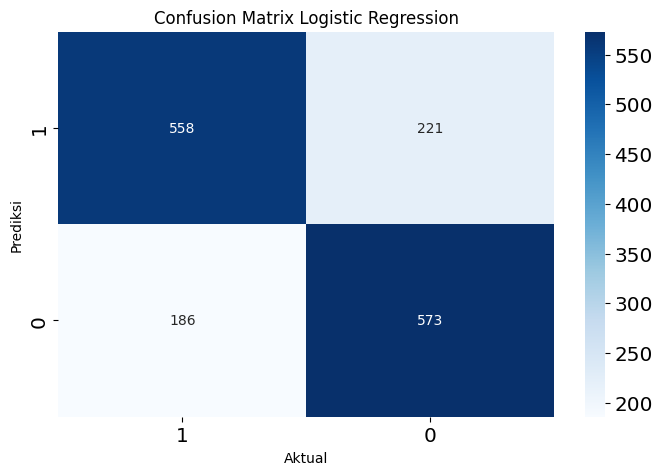

In [61]:
lr_pred = logreg1.predict(X_test)
conf_matrix_viz(y_test, lr_pred, 'Logistic Regression')

### 3.2.2 Decision Tree

In [62]:
# Sebelum tuning
dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.88
Recall (Test Set): 0.92
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 1.00
precision (crossval test): 0.89
precision (train-test gap): 0.11


In [63]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

dt = DecisionTreeClassifier(random_state=random_state)
rs = RandomizedSearchCV(dt, hyperparameters, scoring='precision', random_state=random_state, cv=5)
rs.fit(X_train, y_train)
# eval_classification(rs)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=328),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                      27, 31, 34, 38, 42, 46,
                                                      49, 53, 57, 61, 64, 68,
                                                      72, 76, 79, 83, 87, 91,
                                                      94, 98, 102, 106, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'splitter': ['best', 'random']},
                   random_state=328, scoring='precision')

In [64]:
# Cetak hyperparameter terbaik yang ditemukan
print("Hyperparameter Terbaik:", rs.best_params_)

Hyperparameter Terbaik: {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 68, 'criterion': 'entropy'}


In [65]:
# Tuning sesuai hyperparameter terbaik
dt1 = DecisionTreeClassifier(random_state=random_state, **rs.best_params_)
dt1.fit(X_train, y_train)
eval_classification(dt1)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.85
Recall (Test Set): 0.88
F1-Score (Test Set): 0.86
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 0.97
precision (crossval test): 0.84
precision (train-test gap): 0.13


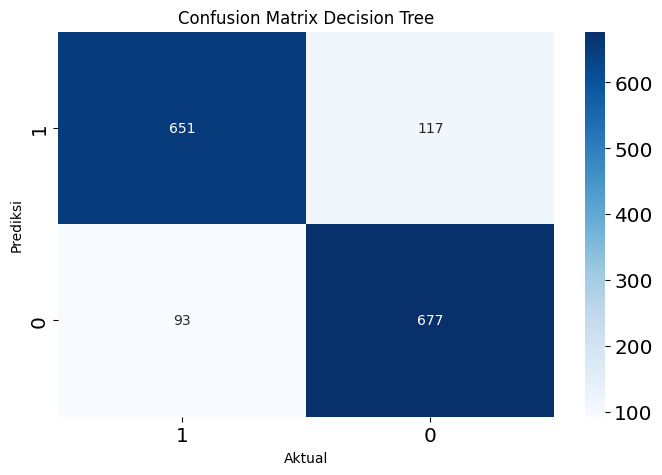

In [66]:
dt_pred = dt1.predict(X_test)
conf_matrix_viz(y_test, dt_pred, 'Decision Tree')

### 3.2.3 Random Forest

In [67]:
# Algoritma Random Forest tanpa hyperparameter tuning
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.94
Recall (Test Set): 0.98
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 1.00
precision (crossval test): 0.95
precision (train-test gap): 0.05


In [68]:
# Hyperparameter tuning dengan random search
n_estimators = [int(x) for x in np.linspace(1, 150, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=random_state)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='precision',  random_state=random_state, cv=5)
rs.fit(X_train, y_train)

# eval_classification(rs)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=328),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, 32, 34, 36, 38,
                                                      40, 42, 44, 46, 48, 50,
                                                      52, 54, 56, 58, 60, ...],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [1, 4, 7, 10, 13, 16,
                                                         19, 22, 25, 28, 31, 34,
                                                         37, 40, 43, 46, 49, 52,
                                                         55, 58, 61, 64, 67, 70,
                                                         73, 77, 80, 83, 86, 89, ...]},
                   random_state=328, scoring='precision')

In [69]:
# Cetak hyperparameter terbaik yang ditemukan
print("Hyperparameter Terbaik:", rs.best_params_)

Hyperparameter Terbaik: {'n_estimators': 98, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_depth': 92, 'criterion': 'entropy'}


In [70]:
# Melakukan tuning berdasarkan parameter terbaik hasil random search
rf1 = RandomForestClassifier(random_state=random_state, **rs.best_params_)
rf1.fit(X_train, y_train)
eval_classification(rf1)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.88
Recall (Test Set): 0.94
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.99

5-fold cross validation
precision (crossval train): 0.94
precision (crossval test): 0.86
precision (train-test gap): 0.08


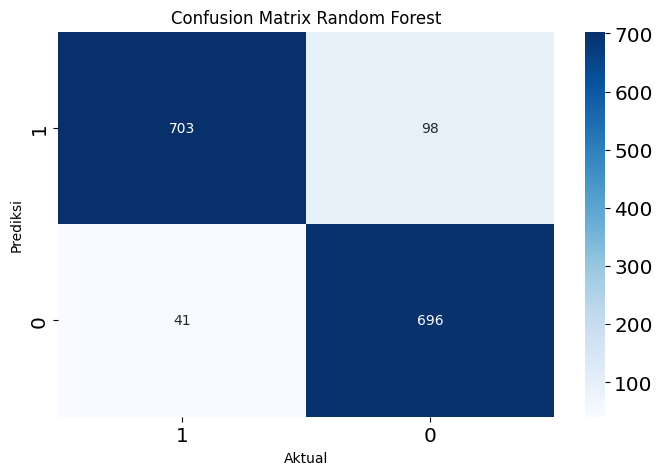

In [71]:
# Membuat confusion matrix berdasarkan hasil tuning di atas
rf_pred = rf1.predict(X_test)
conf_matrix_viz(y_test, rf_pred, 'Random Forest')

### 3.2.4 XGBoost

In [72]:
xg = XGBClassifier(random_state=random_state)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 1.00
precision (crossval test): 0.96
precision (train-test gap): 0.04


In [73]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 100, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=random_state)
rs = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=random_state, scoring='precision')
rs.fit(X_train,y_train)

# Predict & Evaluation
# eval_classification(rs)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                                  0.7000000000000001, 0.8, 0.9,
                                                  1.0],
                                        'lambda': [0.0, 0.1, 0.2,
                                                   0.30000000000000004, 0.4,
                                                   0.5, 0.6000000000000001,
                                                   0.7000000000000001, 0.8, 0.9,
                                                   1.0],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'min_child_weight': [1, 2, 4, 6, 8, 10,
                                                             12, 14, 16, 18,
                                                             20],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=328, scoring='precision')

In [74]:
# Cetak hyperparameter terbaik yang ditemukan
print("Hyperparameter Terbaik:", rs.best_params_)

Hyperparameter Terbaik: {'tree_method': 'exact', 'min_child_weight': 6, 'max_depth': 46, 'lambda': 0.1, 'gamma': 0.0, 'eta': 0.23232323232323235, 'colsample_bytree': 0.6000000000000001, 'alpha': 0.0}


In [75]:
xg1 = XGBClassifier(random_state=random_state, **rs.best_params_)
xg1.fit(X_train, y_train)
eval_classification(xg1)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.94
Recall (Test Set): 0.97
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 1.00
precision (crossval test): 0.95
precision (train-test gap): 0.05


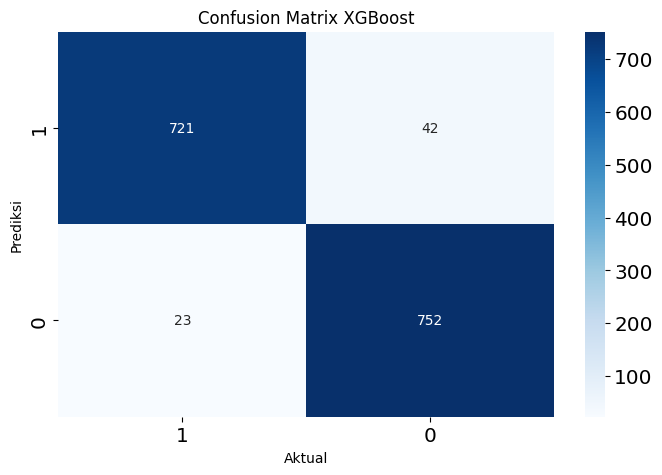

In [76]:
xg_pred = xg1.predict(X_test)

conf_matrix_viz(y_test,xg_pred, 'XGBoost')

### 3.2.5 AdaBoost


In [77]:
# Adaboost
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=4,
                            random_state=random_state, criterion='entropy'), random_state=random_state)

ab.fit(X_train, y_train)
eval_classification(ab)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.96
Recall (Test Set): 0.98
F1-Score (Test Set): 0.97
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 1.00
precision (crossval test): 0.97
precision (train-test gap): 0.03


In [78]:
# List of hyperparameter
boosting_param = {'n_estimators' : [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                  'learning_rate' : [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],
                  'algorithm' : ['SAMME', 'SAMME.R'],
                  'base_estimator' : [DecisionTreeClassifier(random_state=random_state)]}



# Init model
ab1 = AdaBoostClassifier(random_state=random_state)
ab_tuned = RandomizedSearchCV(ab1, boosting_param, random_state=random_state, cv=5, scoring='precision')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
# eval_classification(ab_tuned)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=328),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator': [DecisionTreeClassifier(random_state=328)],
                                        'learning_rate': [0.001,
                                                          0.0014974874371859296,
                                                          0.0019949748743718593,
                                                          0.002492462311557789,
                                                          0.0029899497487437185,
                                                          0.003487437185929648,
                                                          0.003984924623115577,
                                                          0.004482412060...
                                                          0.010949748743718592,
                                                          0.011447236180904524,
                                                          0.011944723618090451,
                                                          0.012442211055276382,
                                                          0.01293969849246231,
                                                          0.013437185929648241,
                                                          0.013934673366834169,
                                                          0.0144321608040201,
                                                          0.014929648241206031,
                                                          0.015427135678391959, ...],
                                        'n_estimators': [50, 50, 51, 52, 53, 54,
                                                         55, 56, 57, 58, 59, 60,
                                                         61, 62, 63, 64, 65, 66,
                                                         67, 68, 69, 70, 71, 72,
                                                         73, 74, 75, 76, 77, 78, ...]},
                   random_state=328, scoring='precision')

In [79]:
# Cetak hyperparameter terbaik yang ditemukan
print("Hyperparameter Terbaik:", ab_tuned.best_params_)

Hyperparameter Terbaik: {'n_estimators': 678, 'learning_rate': 0.07711557788944723, 'base_estimator': DecisionTreeClassifier(random_state=328), 'algorithm': 'SAMME.R'}


In [80]:
ab1 = AdaBoostClassifier(random_state=random_state, **ab_tuned.best_params_)
ab1.fit(X_train, y_train)
eval_classification(ab1)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.89
Recall (Test Set): 0.92
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 1.00
precision (crossval test): 0.89
precision (train-test gap): 0.11


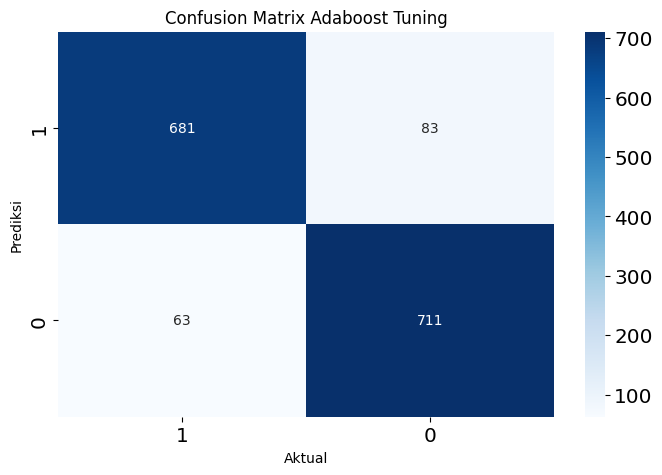

In [81]:
ab1_pred = ab1.predict(X_test)
conf_matrix_viz(y_test, ab1_pred,'Adaboost Tuning')

### 3.2.6 Bagging

In [82]:
# Bagging non tuning
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=4,
                            random_state=random_state, criterion='entropy'), random_state=random_state)

bagging.fit(X_train, y_train)
eval_classification(bagging)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.92
Recall (Test Set): 0.96
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 0.99
precision (crossval test): 0.92
precision (train-test gap): 0.07


In [83]:
bagging_param = {
    'n_estimators' : [50,100,150,200],
    'max_samples' : [5,10,100],
    'base_estimator' : [DecisionTreeClassifier(random_state=random_state)]
  }

bagging_tuning = BaggingClassifier()
BT = RandomizedSearchCV(bagging_tuning, bagging_param, scoring='precision', random_state=random_state, cv=5)
BT.fit(X_train,y_train)
# eval_classification(BT)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(),
                   param_distributions={'base_estimator': [DecisionTreeClassifier(random_state=328)],
                                        'max_samples': [5, 10, 100],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=328, scoring='precision')

In [84]:
# Cetak hyperparameter terbaik yang ditemukan
print("Hyperparameter Terbaik:", BT.best_params_)

Hyperparameter Terbaik: {'n_estimators': 200, 'max_samples': 100, 'base_estimator': DecisionTreeClassifier(random_state=328)}


In [85]:
bagging_tuning = bagging_tuning.set_params(**BT.best_params_)
bagging_tuning.fit(X_train, y_train)
eval_classification(bagging_tuning)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.74
Recall (Test Set): 0.78
F1-Score (Test Set): 0.76
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.86

5-fold cross validation
precision (crossval train): 0.78
precision (crossval test): 0.71
precision (train-test gap): 0.07


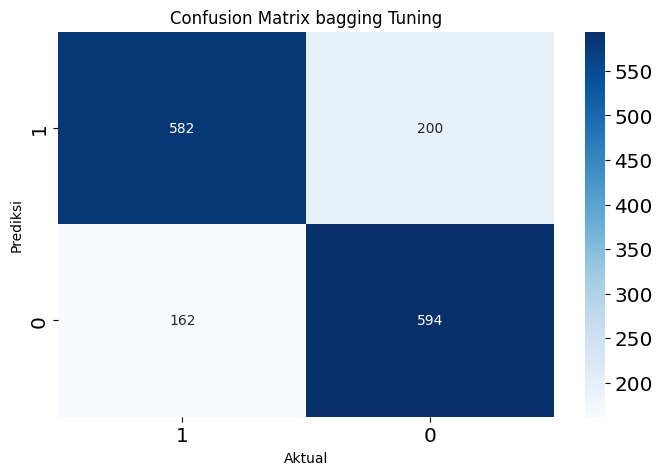

In [86]:
bagging_tuning_pred = bagging_tuning.predict(X_test)
conf_matrix_viz(y_test, bagging_tuning_pred, 'bagging Tuning')

### 3.2.7 Model Selection

In [87]:
eval_table = pd.DataFrame(eval_score)
eval_table['model name'] = ['LogisticRegression', 'LogisticRegression tuned',
                            'DecisionTree', 'DecisionTree tuned',
                            'RandomForest', 'RandomForest tuned',
                            'XGBoost', 'XGBoost tuned',
                            'AdaBoost', 'AdaBoost tuned',
                            'Bagging', 'Bagging tuned',]
eval_table

,model,precision,cv train,cv test,cv gap,model name
0,LogisticRegression(random_state=328),0.72,0.76,0.71,0.05,LogisticRegression
1,"LogisticRegression(C=8.282845454545454, random...",0.72,0.76,0.71,0.05,LogisticRegression tuned
2,DecisionTreeClassifier(random_state=328),0.88,1.00,0.89,0.11,DecisionTree
3,"DecisionTreeClassifier(criterion='entropy', ma...",0.85,0.97,0.84,0.13,DecisionTree tuned
4,RandomForestClassifier(random_state=328),0.94,1.00,0.95,0.05,RandomForest
5,"RandomForestClassifier(criterion='entropy', ma...",0.88,0.94,0.86,0.08,RandomForest tuned
6,"XGBClassifier(base_score=None, booster=None, c...",0.95,1.00,0.96,0.04,XGBoost
7,"XGBClassifier(alpha=0.0, base_score=None, boos...",0.94,1.00,0.95,0.05,XGBoost tuned
8,AdaBoostClassifier(base_estimator=DecisionTree...,0.96,1.00,0.97,0.03,AdaBoost
9,AdaBoostClassifier(base_estimator=DecisionTree...,0.89,1.00,0.89,0.11,AdaBoost tuned


Tabel di atas menunjukkan hasil dari masing-masing algoritma sebelum dan setelah tuning berdasar best_params dari random search. Untuk mempermudah pemilihan model, tabel tersebut akan di urutkan berdasar nilai precision

In [88]:
eval_table_sort = eval_table.sort_values(by='precision', ascending=False)
eval_table_sort[['model name', 'precision', 'cv train', 'cv test', 'cv gap']]

,model name,precision,cv train,cv test,cv gap
8,AdaBoost,0.96,1.00,0.97,0.03
6,XGBoost,0.95,1.00,0.96,0.04
4,RandomForest,0.94,1.00,0.95,0.05
7,XGBoost tuned,0.94,1.00,0.95,0.05
10,Bagging,0.92,0.99,0.92,0.07
9,AdaBoost tuned,0.89,1.00,0.89,0.11
2,DecisionTree,0.88,1.00,0.89,0.11
5,RandomForest tuned,0.88,0.94,0.86,0.08
3,DecisionTree tuned,0.85,0.97,0.84,0.13
11,Bagging tuned,0.74,0.78,0.71,0.07


Berdasarkan list tersebut, model yang dipilih adalah AdaBoost

In [89]:
# model yang dipilih
selected = ab
eval_classification(selected)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.96
Recall (Test Set): 0.98
F1-Score (Test Set): 0.97
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00

5-fold cross validation
precision (crossval train): 1.00
precision (crossval test): 0.97
precision (train-test gap): 0.03


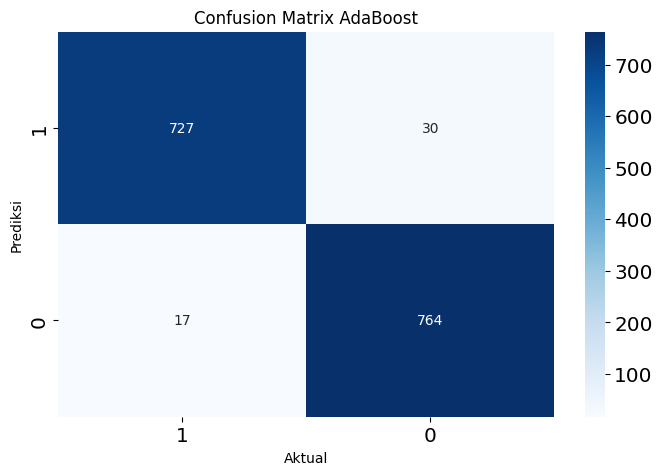

In [90]:
selected_pred = selected.predict(X_test)
conf_matrix_viz(y_test, selected_pred, 'AdaBoost')

## 3.3 Feature Importance

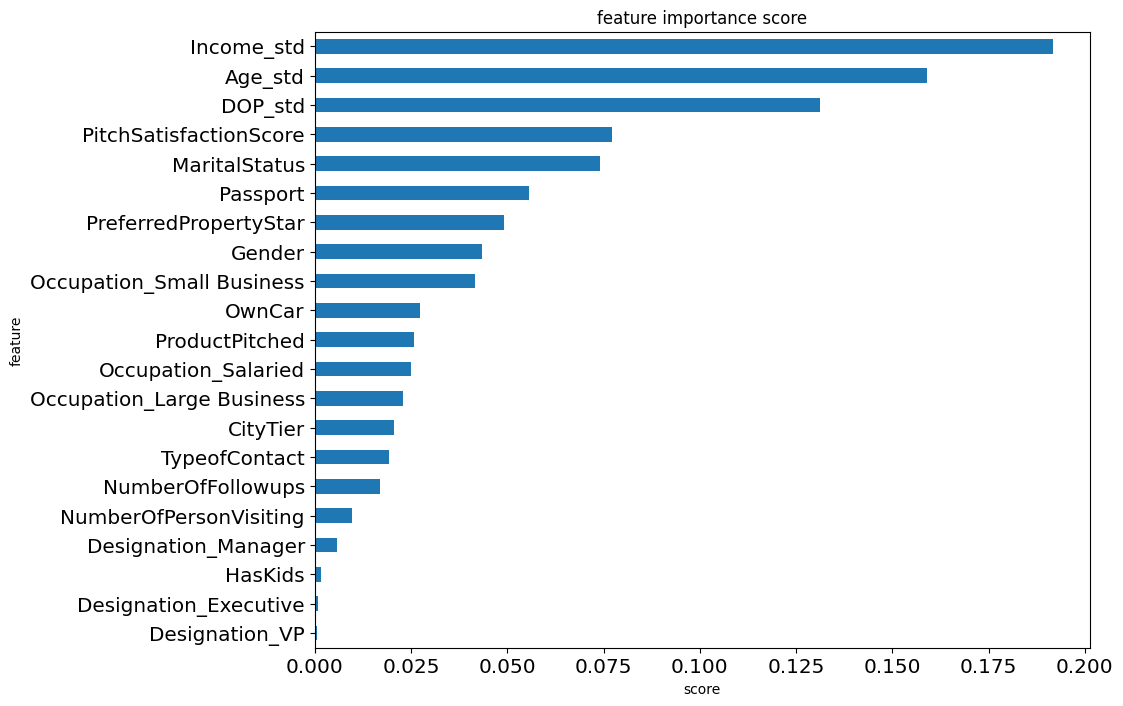

In [91]:
show_feature_importance(selected)

### 3.3.1 Feature Evaluation

Dalam projek ini, kami menggunakan model Adaboost untuk
memprediksi pelanggan mana yang akan membeli produk kesehatan
baru. Nilai precision akhir adalah 96%. Feature yang paling penting
untuk memprediksi paket baru adalah Duration Of Pitch, Monthly
Income, dan Age.

Secara bisnis, hal tersebut berarti calon customer yang diberikan penawaran dengan durasi yang cepat oleh tim pemasaran, tingkat pendapatan perbulan, dan usia memiliki pengaruh yang lebih tinggi terhadap keputusan customer untuk
membeli paket baru.

Hal yang cukup menarik adalah feature designation_executive justru memiliki pengaruh rendah, padahal pada proses EDA terlihat adanya jumlah signifikan pada customer yang membeli produk dengan posisi executive. Hal ini bisa jadi disebabkan oleh peleburan Senior Manager menjadi Manager sehingga designation_manager terlihat lebih berpengaruh oleh model.

Fitur HasKids yang dibuat pada proses feature engineering menunjukkan pengaruh yang sangat lemah terhadap keputusan untuk membeli produk.

### 3.3.2 Recommendations

Berdasarkan feature importance tersebut, rekomendasi bisnis yang diberikan kepada tim marketing akan difokuskan pada fitur pada peringkat 3 teratas, yaitu Monthly Income, Age, dan Duration Of Pitch. Rekomendasi yang dapat diberikan antara lain:
1. Monthly Income
    - **Pengembangan produk terjangkau**: Menawarkan opsi paket dengan harga yang sesuai dengan penghasilan perbulan customer. Misalnya pada range harga produk seperti Basic dan Standard yang lebih sering dibeli.
2. Age
    - **Berfokus Kebutuhan Customer**: Sesuaikan paket yang memenuhi kebutuhan khusus customer sesuai kelompok usia. Karena mayoritas customer berada pada usia bekerja, pembuatan produk lebih difokuskan terhadap masalah yang umum dihadapi pada usia tersebut.
3. Duration Of Pitch
    - **Fokus pada pitch yang efisien**: Meningkatkan latihan pada tim marketing agar dapat mengidentifikasi kebutuhan customer dengan cepat. Komunikasikan poin-poin penting penawaran dengan jelas dan langsung kepada calon customer.
    - **Berikan penawaran khusus**: Perusahaan bisa memberikan diskon eksklusif, hadiah tambahan, yang dapat mendorong customer untuk mengambil keputusan pembelian dengan cepat.



Rekomendasi terhadap machine learning iterasi selanjutnya antara lain:
1. Fitur HasKids dapat dibuang untuk iterasi selanjutnya
2. 3 fitur designation dapat dikaji ulang pada proses pre-processing